In [1]:
from dataexplore import *
from preprocess import * 
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import pylab as pl

from __future__ import division
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import ParameterGrid

from sklearn.preprocessing import StandardScaler
import random
from scipy import optimize
from scipy.stats import skew
import time
import seaborn as sns


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
credit_data = read_data("credit-data.csv")

In [3]:
credit_data[:5]

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0         1                 1                              0.766127   45   
1         2                 0                              0.957151   40   
2         3                 0                              0.658180   38   
3         4                 0                              0.233810   30   
4         5                 0                              0.907239   49   

   zipcode  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0    60644                                     2   0.802982         9120.0   
1    60637                                     0   0.121876         2600.0   
2    60601                                     1   0.085113         3042.0   
3    60601                                     0   0.036050         3300.0   
4    60625                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [4]:
get_statistics(credit_data)

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age        zipcode  NumberOfTime30-59DaysPastDueNotWorse  \
count  150000.000000  150000.000000                         150000.000000   
mean       52.295207   60648.810013                              0.421033   
std        14.771866      56.748197                              4.192781   
min         0.000000   60601.000000                              0.000000   
25%        41.000000   60625.000000                              0.000000   
50%        52.000000   60629.000000                              0.000000   
75%        63.000000   60644.000000                              0.000000   
max       109.000000   60804.000000                             98.000000   

           DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count  150000.000000   1.202690e+05                    150000.000000   
mean      353.005076   6.670221e+03                         8.452760   
std      2037.818523   1.438467e+04                         5.145951   
min         0.000000   0.000000e+00                         0.000000   
25%         0.175074   3.400000e+03                         5.000000   
50%         0.366508   5.400000e+03                         8.000000   
75%         0.868254   8.249000e+03                        11.000000   
max    329664.000000   3.008750e+06                        58.000000   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
count            150000.000000                 150000.000000   
mean                  0.265973                      1.018240   
std                   4.169304                      1.129771   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      1.000000   
75%                   0.000000                      2.000000   
max                  98.000000                     54.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         150000.000000       146076.000000  
mean                               0.240387            0.757222  
std                                4.155179            1.115086  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           20.000000

In [5]:
get_col_means(credit_data, ["age", "DebtRatio"], return_value=False)

The mean of age is 52.2952066667
The mean of DebtRatio is 353.005075764


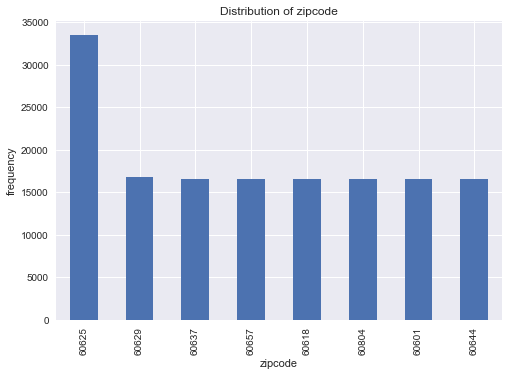

In [6]:
get_frequency_chart(credit_data, "zipcode", "bar")

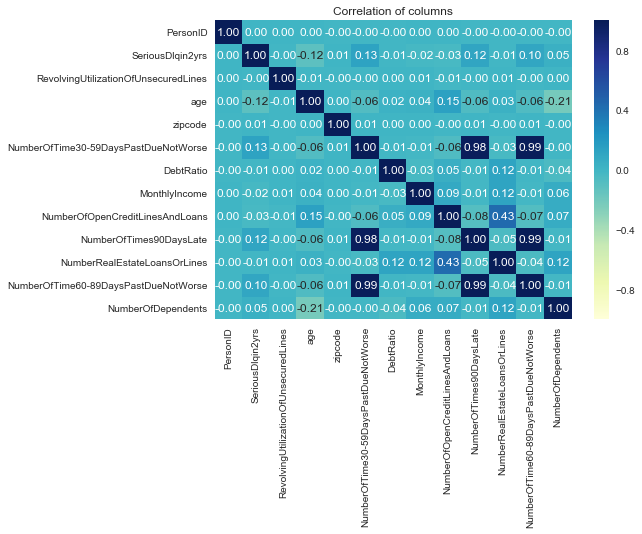

In [7]:
correlation(credit_data)

In [8]:
credit_data.isnull().sum()

PersonID                                    0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
zipcode                                     0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [9]:
fill_missing(credit_data, "MonthlyIncome", 'median')
fill_missing(credit_data, 'NumberOfDependents','mean')

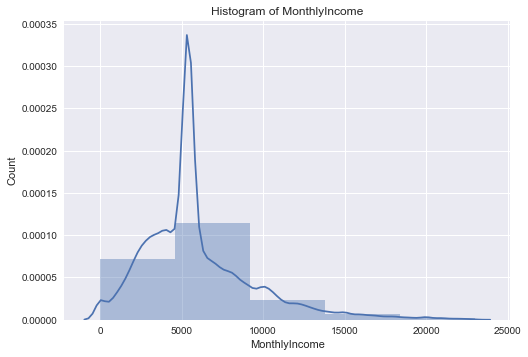

In [10]:
histogram(credit_data, 'MonthlyIncome', 5)

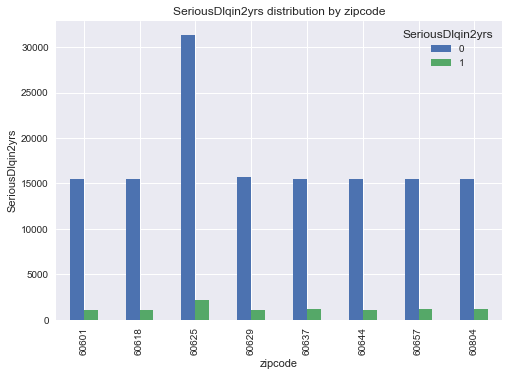

In [11]:
graph_crosstab(credit_data, 'zipcode', 'SeriousDlqin2yrs')

In [12]:
stats = stats_by_var(credit_data, "SeriousDlqin2yrs", 'mean')
stats[['DebtRatio', 'MonthlyIncome', 'age', 'NumberOfDependents']]


DebtRatio  MonthlyIncome        age  NumberOfDependents
SeriousDlqin2yrs                                                          
0                 357.151168    6477.623137  52.751375            0.743787
1                 295.121066    5592.401456  45.926591            0.944798

In [14]:
discretize(credit_data, 'MonthlyIncome', "MonthlyIncome_cat", 4, None)

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0              1                 1                              0.766127   45   
1              2                 0                              0.957151   40   
2              3                 0                              0.658180   38   
3              4                 0                              0.233810   30   
4              5                 0                              0.907239   49   
5              6                 0                              0.213179   74   
6              7                 0                              0.305682   57   
7              8                 0                              0.754464   39   
8              9                 0                              0.116951   27   
9             10                 0                              0.189169   57   
10            11                 0                              0.644226   30   
11            12                 0                              0.018798   51   
12            13                 0                              0.010352   46   
13            14                 1                              0.964673   40   
14            15                 0                              0.019657   76   
15            16                 0                              0.548458   64   
16            17                 0                              0.061086   78   
17            18                 0                              0.166284   53   
18            19                 0                              0.221813   43   
19            20                 0                              0.602794   25   
20            21                 0                              0.200923   43   
21            22                 1                              0.025656   38   
22            23                 0                              1.000000   39   
23            24                 0                              0.075427   32   
24            25                 0                              0.046560   58   
25            26                 1                              0.392248   50   
26            27                 0                              0.052436   58   
27            28                 0                              0.034421   69   
28            29                 0                              0.452516   24   
29            30                 0                              0.392995   58   
...          ...               ...                                   ...  ...   
149970    149971                 0                              0.025449   58   
149971    149972                 0                              0.058001   83   
149972    149973                 0                              0.071273   42   
149973    149974                 0                              1.026395   44   
149974    149975                 0                              0.962721   61   
149975    149976                 0                              0.022088   58   
149976    149977                 0                              0.000627   76   
149977    149978                 0                              0.236450   29   
149978    149979                 0                              0.917635   52   
149979    149980                 1                              0.224711   55   
149980    149981                 0                              0.067644   64   
149981    149982                 0                              0.810012   43   
149982    149983                 0                              0.021046   37   
149983    149984                 0                              0.002485   82   
149984    149985                 0                              0.037548   84   
149985    149986                 0                              0.954409   26   
149986    149987                 0                              0.168102   49   
149987    149988                 0     

In [16]:
make_binary(credit_data, ['MonthlyIncome_cat'])

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0              1                 1                              0.766127   45   
1              2                 0                              0.957151   40   
2              3                 0                              0.658180   38   
3              4                 0                              0.233810   30   
4              5                 0                              0.907239   49   
5              6                 0                              0.213179   74   
6              7                 0                              0.305682   57   
7              8                 0                              0.754464   39   
8              9                 0                              0.116951   27   
9             10                 0                              0.189169   57   
10            11                 0                              0.644226   30   
11            12                 0                              0.018798   51   
12            13                 0                              0.010352   46   
13            14                 1                              0.964673   40   
14            15                 0                              0.019657   76   
15            16                 0                              0.548458   64   
16            17                 0                              0.061086   78   
17            18                 0                              0.166284   53   
18            19                 0                              0.221813   43   
19            20                 0                              0.602794   25   
20            21                 0                              0.200923   43   
21            22                 1                              0.025656   38   
22            23                 0                              1.000000   39   
23            24                 0                              0.075427   32   
24            25                 0                              0.046560   58   
25            26                 1                              0.392248   50   
26            27                 0                              0.052436   58   
27            28                 0                              0.034421   69   
28            29                 0                              0.452516   24   
29            30                 0                              0.392995   58   
...          ...               ...                                   ...  ...   
149970    149971                 0                              0.025449   58   
149971    149972                 0                              0.058001   83   
149972    149973                 0                              0.071273   42   
149973    149974                 0                              1.026395   44   
149974    149975                 0                              0.962721   61   
149975    149976                 0                              0.022088   58   
149976    149977                 0                              0.000627   76   
149977    149978                 0                              0.236450   29   
149978    149979                 0                              0.917635   52   
149979    149980                 1                              0.224711   55   
149980    149981                 0                              0.067644   64   
149981    149982                 0                              0.810012   43   
149982    149983                 0                              0.021046   37   
149983    149984                 0                              0.002485   82   
149984    149985                 0                              0.037548   84   
149985    149986                 0                              0.954409   26   
149986    149987                 0                              0.168102   49   
149987    149988                 0     

In [33]:
###MAGIC LOOP STUFF##

def define_clfs_params(grid_size):

    clfs = {'RF': RandomForestClassifier(n_estimators=50, n_jobs=-1),
        'ET': ExtraTreesClassifier(n_estimators=10, n_jobs=-1, criterion='entropy'),
        'AB': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200),
        'LR': LogisticRegression(penalty='l1', C=1e5),
        'SVM': svm.SVC(kernel='linear', probability=True, random_state=0),
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10),
        'NB': GaussianNB(),
        'DT': DecisionTreeClassifier(),
        'SGD': SGDClassifier(loss="hinge", penalty="l2"),
        'KNN': KNeighborsClassifier(n_neighbors=3) 
            }
    
    rayid_small_grid = { 
    'RF':{'n_estimators': [10,100], 'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'LR': { 'penalty': ['l1','l2'], 'C': [0.00001,0.001,0.1,1,10]},
    'SGD': { 'loss': ['hinge','log','perceptron'], 'penalty': ['l2','l1','elasticnet']},
    'ET': { 'n_estimators': [10,100], 'criterion' : ['gini', 'entropy'] ,'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'AB': { 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000,10000]},
    'GB': {'n_estimators': [10,100], 'learning_rate' : [0.001,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [5,50]},
    'NB' : {},
    'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
    #'SVM' :{'C' :[0.00001,0.0001,0.001,0.01,0.1,1,10],'kernel':['linear']},
    'KNN' :{'n_neighbors': [1,5,10,25,50,100],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']}
           }
    
    small_grid = { 
    'RF':{'n_estimators': [10,100], 'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'LR': { 'penalty': ['l1','l2'], 'C': [0.001,0.1,1]},
    'SGD': { 'loss': ['hinge','log','perceptron'], 'penalty': ['l2','l1','elasticnet']},
    'ET': { 'n_estimators': [10,100], 'criterion' : ['gini', 'entropy'] ,'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'AB': { 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [10,100,1000]},
    'GB': {'n_estimators': [10,100], 'learning_rate' : [0.1,0.5],'subsample' : [0.1,0.5,], 'max_depth': [5,20]},
    'NB' : {},
    'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,5,10,20], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
    #'SVM' :{'C' :[0.00001,0.0001,0.001,0.01,0.1,1,10],'kernel':['linear']},
    'KNN' :{'n_neighbors': [1,5,10,25],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']}
           }
    
    test_grid = { 
    'RF':{'n_estimators': [1], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
    'LR': { 'penalty': ['l1'], 'C': [0.01]},
    'SGD': { 'loss': ['perceptron'], 'penalty': ['l2']},
    'ET': { 'n_estimators': [1], 'criterion' : ['gini'] ,'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
    'AB': { 'algorithm': ['SAMME'], 'n_estimators': [1]},
    'GB': {'n_estimators': [1], 'learning_rate' : [0.1],'subsample' : [0.5], 'max_depth': [1]},
    'NB' : {},
    'DT': {'criterion': ['gini'], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
    #'SVM' :{'C' :[0.01],'kernel':['linear']},
    'KNN' :{'n_neighbors': [5],'weights': ['uniform'],'algorithm': ['auto']}
           }
    
    if (grid_size == 'large'):
        return clfs, large_grid
    elif (grid_size == 'small'):
        return clfs, small_grid
    elif (grid_size == 'test'):
        return clfs, test_grid
    else:
        return 0, 0

def generate_binary_at_k(y_scores, k):
    cutoff_index = int(len(y_scores) * (k / 100.0))
    test_predictions_binary = [1 if x < cutoff_index else 0 for x in range(len(y_scores))]
    return test_predictions_binary

def metrics_at_k(y_true, y_scores, k):
    #get the predicted classifications
    preds_at_k = generate_binary_at_k(y_scores, k)
    precision = precision_score(y_true, preds_at_k)
    accuracy = accuracy_score(y_true, preds_at_k)
    recall = accuracy_score(y_true, preds_at_k)
    return [precision, accuracy, recall]

def plot_precision_recall_n(y_true, y_prob, model_name):
    from sklearn.metrics import precision_recall_curve
    y_score = y_prob
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_score)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_score)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_score>=value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    ax1.set_ylim([0,1])
    ax1.set_ylim([0,1])
    ax2.set_xlim([0,1])
    
    name = model_name
    plt.title(name)
    plt.show()
    


def clf_loop(models_to_run, clfs, grid, X, y):
    results_df =  pd.DataFrame(columns=('model_type','clf', 'parameters', 'auc-roc','p_at_5',
                                        'acc_at_5', 'r_at_5', 'p_at_10', 'acc_at_10','r_at_10',
                                        'p_at_20', 'acc_at_20', 'r_at_20','time'))
    for n in range(1, 2):
        # create training and valdation sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
        for index,clf in enumerate([clfs[x] for x in models_to_run]):
            print (models_to_run[index])
            #create grid of all possible combination of parameters
            parameter_values = grid[models_to_run[index]]
            for p in ParameterGrid(parameter_values):
                try:
                    clf.set_params(**p)
                    start = time.time()
                    y_pred_probs = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
                    # you can also store the model, feature importances, and prediction scores
                    # we're only storing the metrics for now
                    end = time.time()
                    y_pred_probs_sorted, y_test_sorted = zip(*sorted(zip(y_pred_probs, y_test), reverse=True))
                    results_df.loc[len(results_df)] = [models_to_run[index],clf, p,
                                                       roc_auc_score(y_test, y_pred_probs),
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,5.0)[0],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,5.0)[1],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,5.0)[2],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,10.0)[0],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,10.0)[1],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,10.0)[2],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,20.0)[0],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,20.0)[1],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,20.0)[2],
                                                       end - start]
                    
                    plot_precision_recall_n(y_test,y_pred_probs,clf)
                except:
                    print ('Error:',e)
                    continue
    return results_df



def main(df):

    grid_size = 'small'
    clfs, grid = define_clfs_params(grid_size)
    models_to_run = ['ET', 'AB', 'RF', 'DT', 'LR', 'KNN', 'GB']
    features  =  ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'age', 'NumberOfTimes90DaysLate']
    X = df[features]
    y = df.SeriousDlqin2yrs
    results_df = clf_loop(models_to_run, clfs,grid, X,y)
    return results_df
    #if NOTEBOOK == 1:
        #print(results_df)
    #results_df.to_csv('results.csv', index=False)


ET


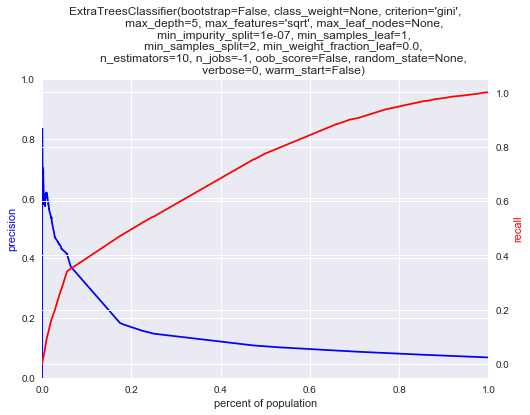

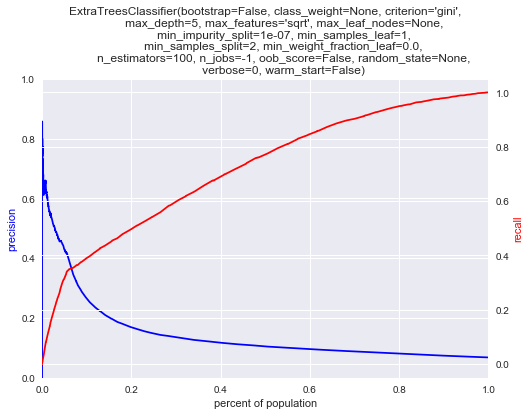

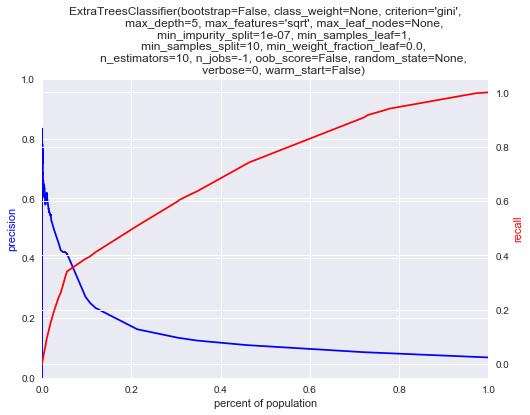

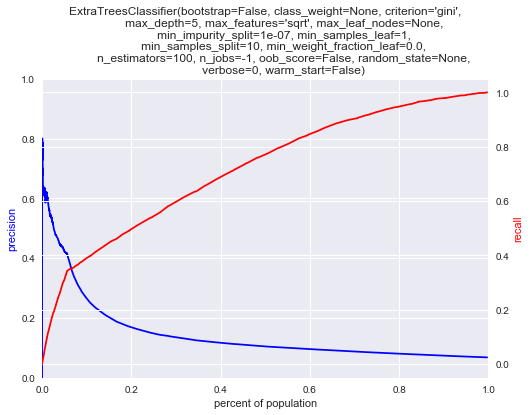

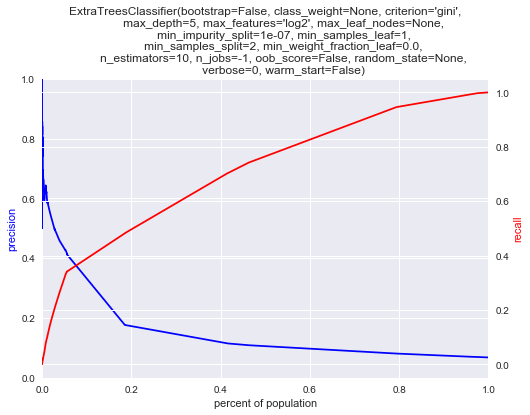

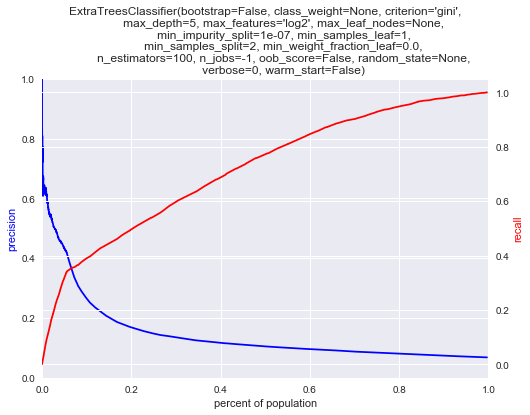

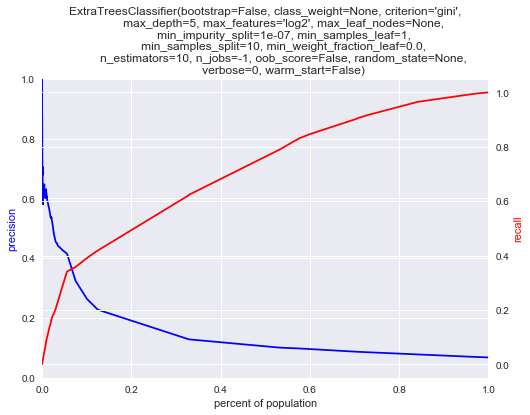

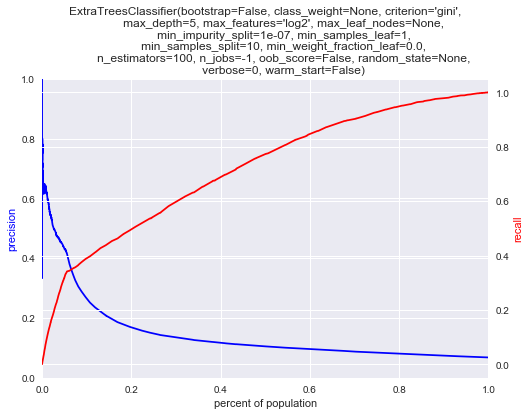

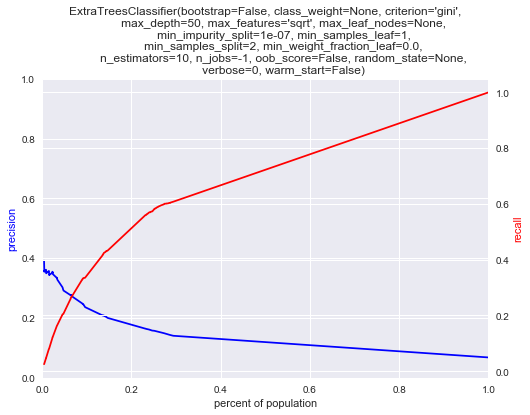

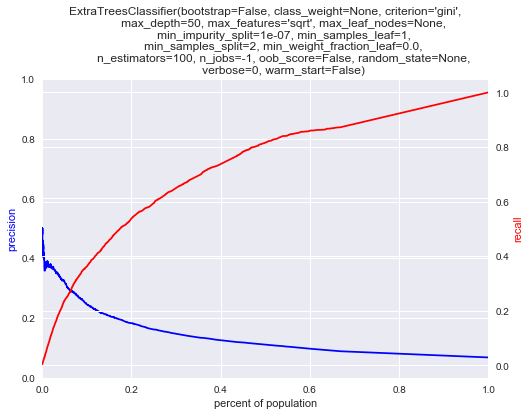

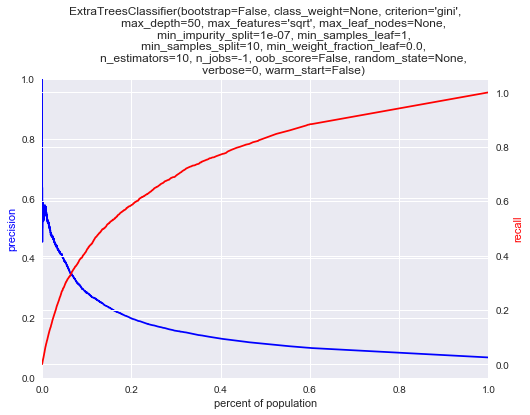

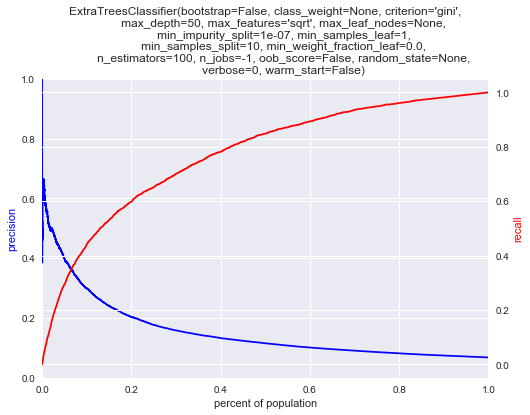

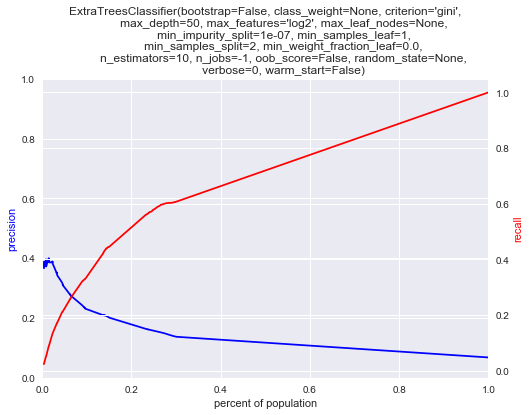

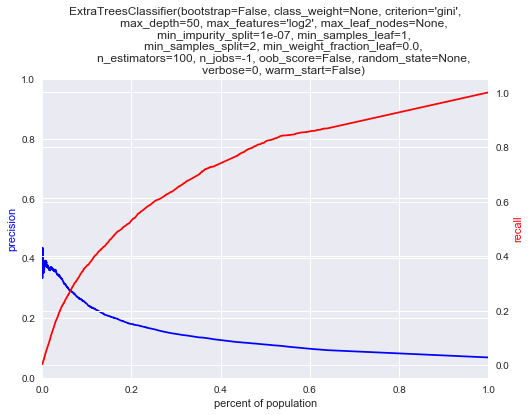

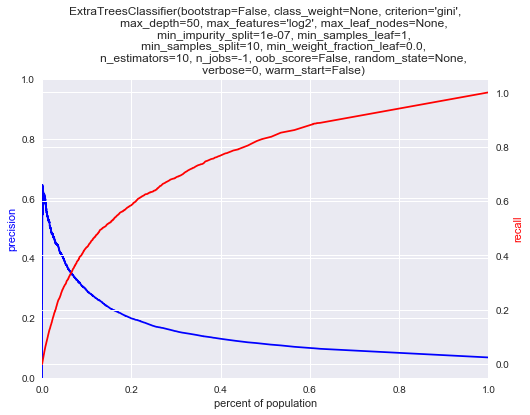

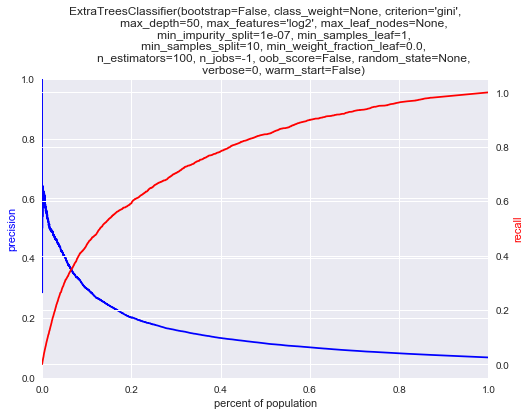

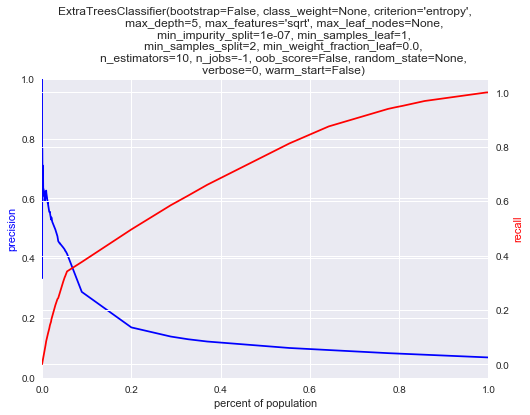

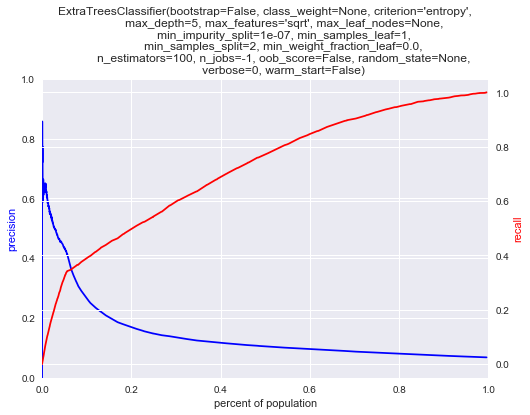

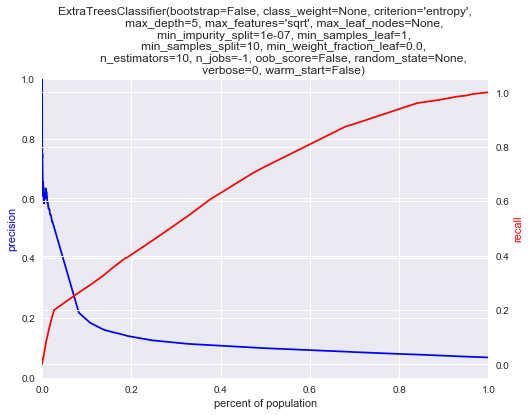

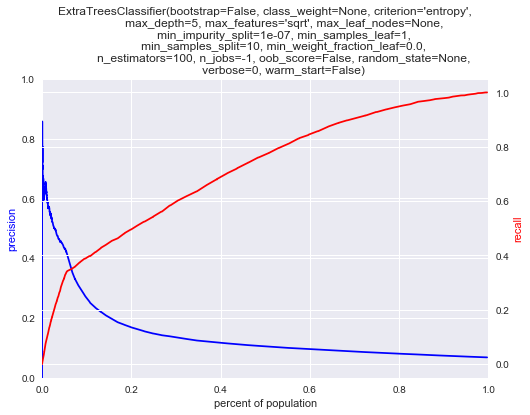

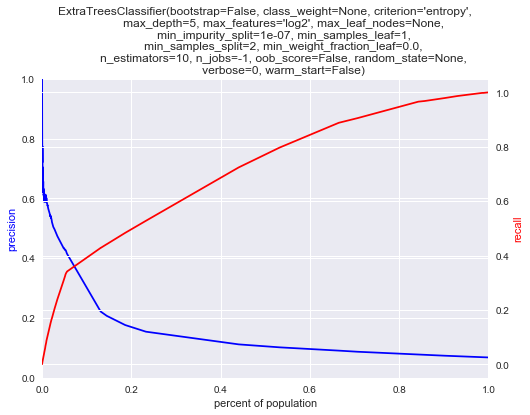

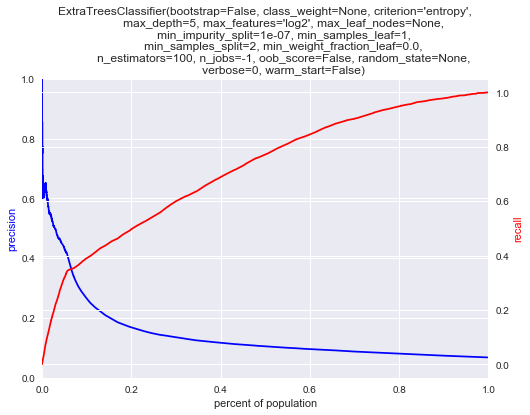

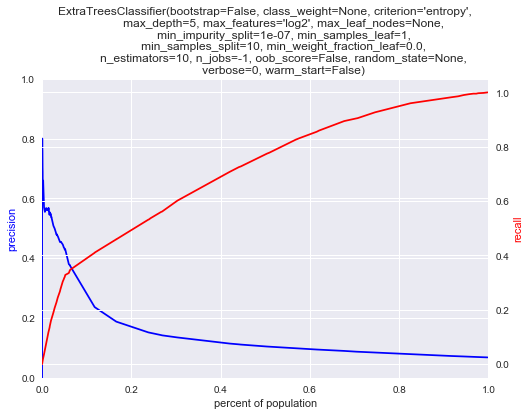

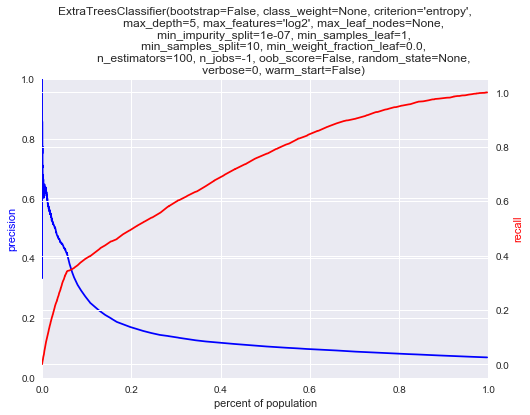

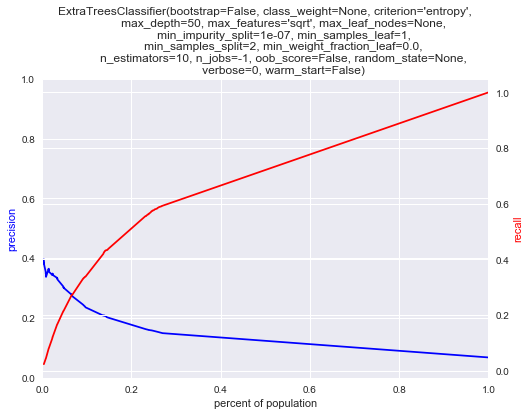

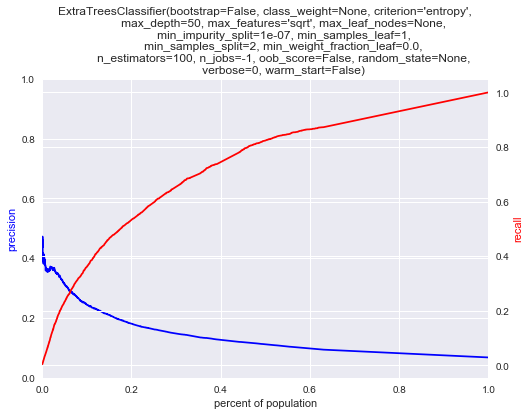

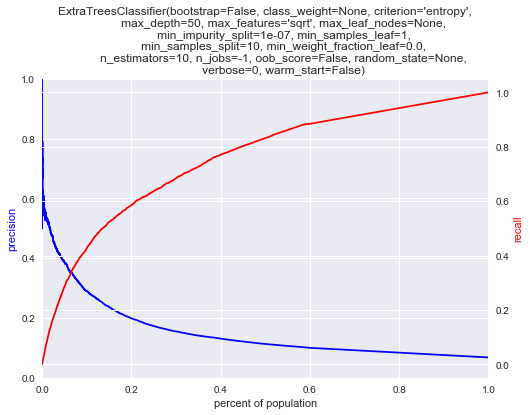

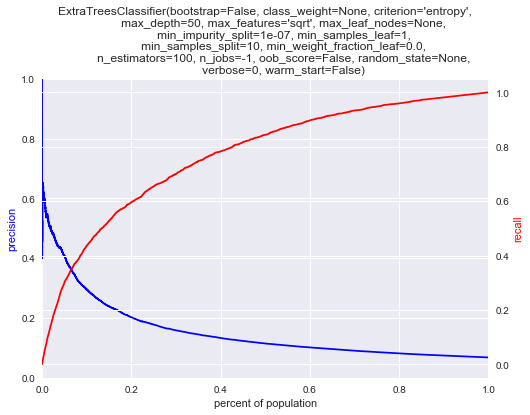

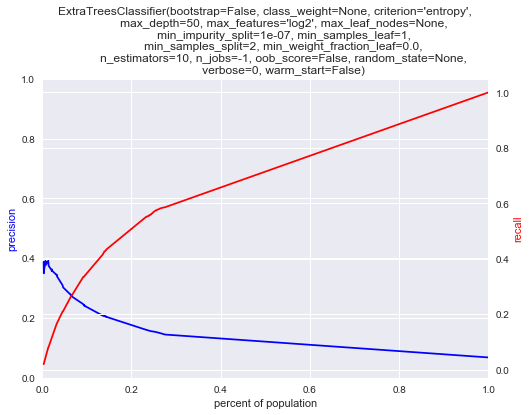

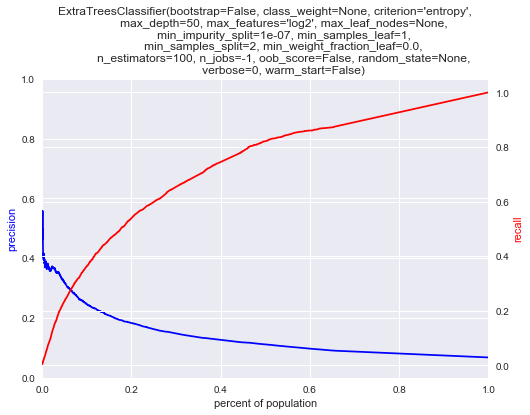

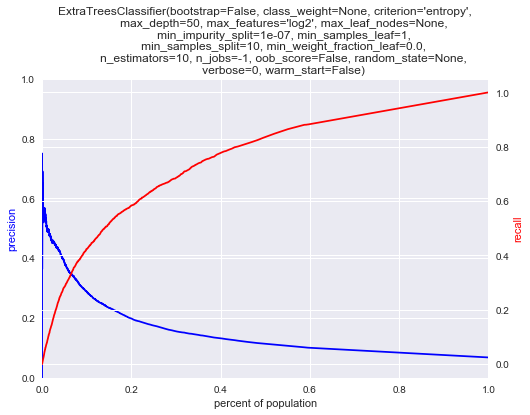

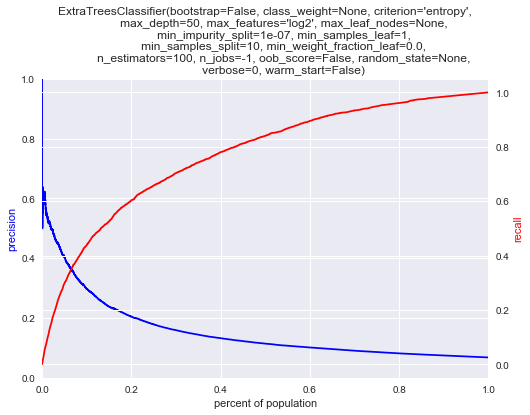

AB


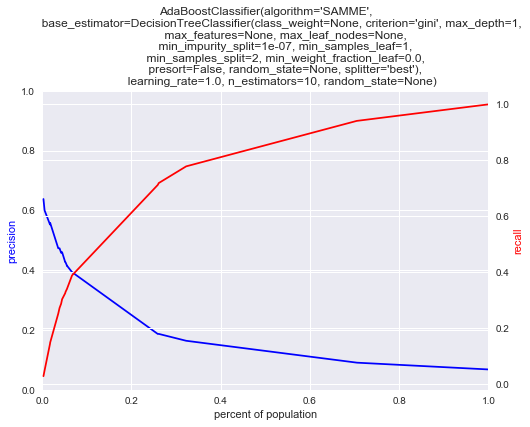

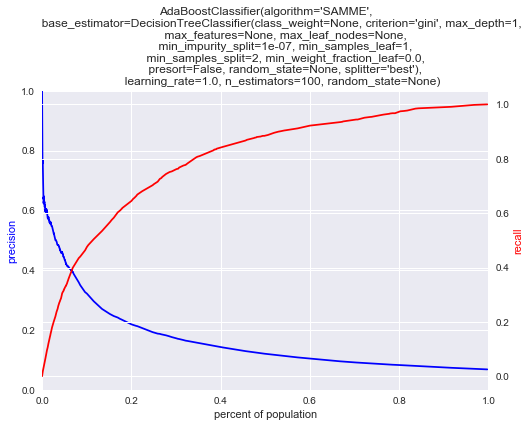

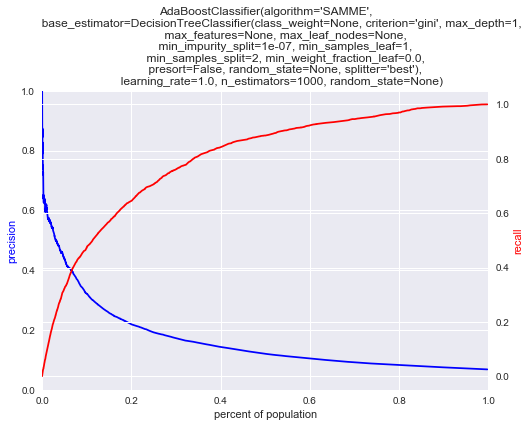

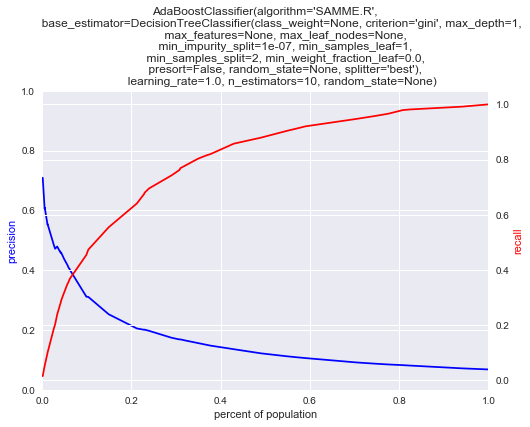

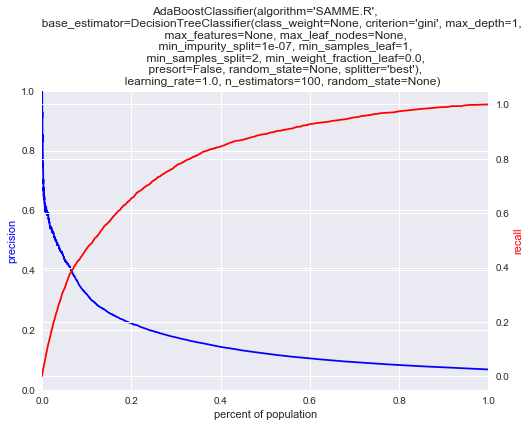

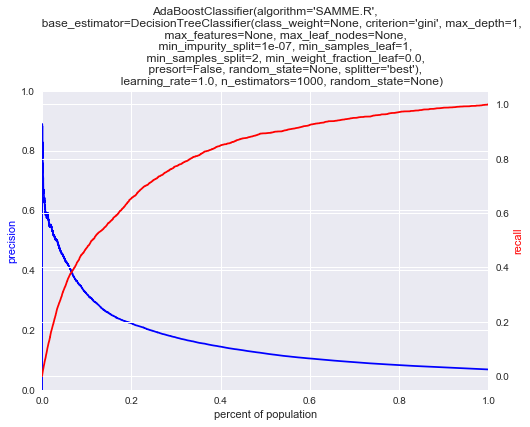

RF


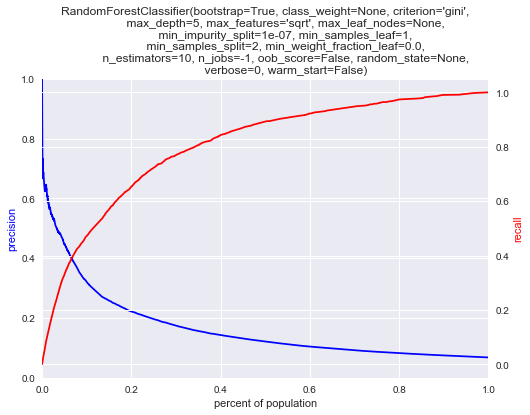

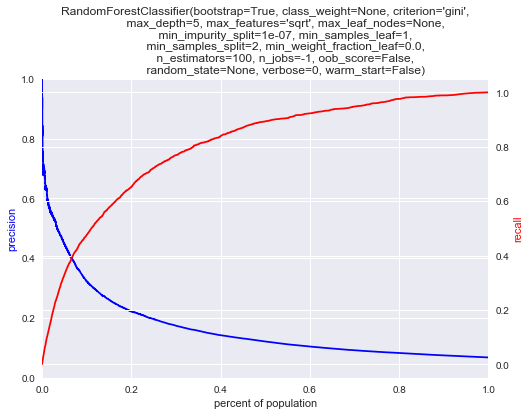

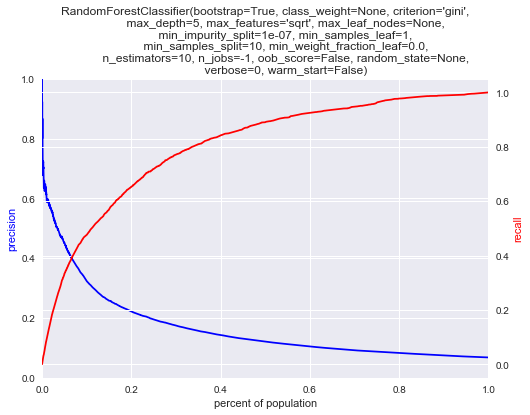

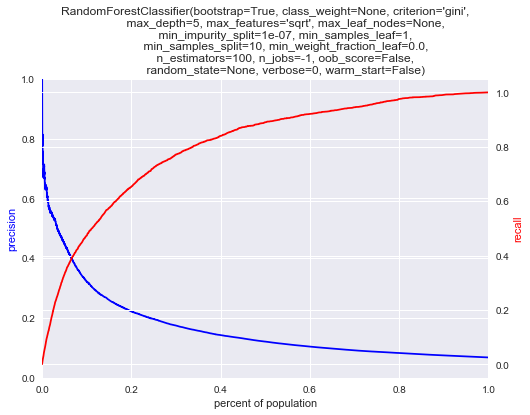

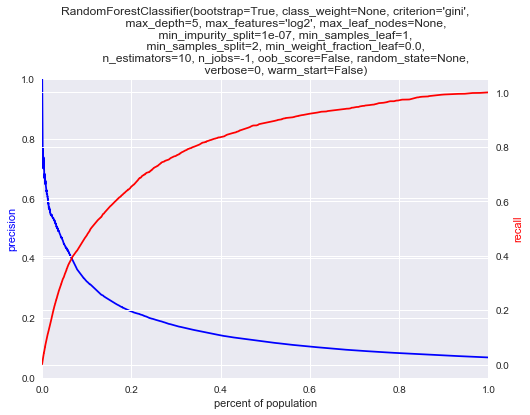

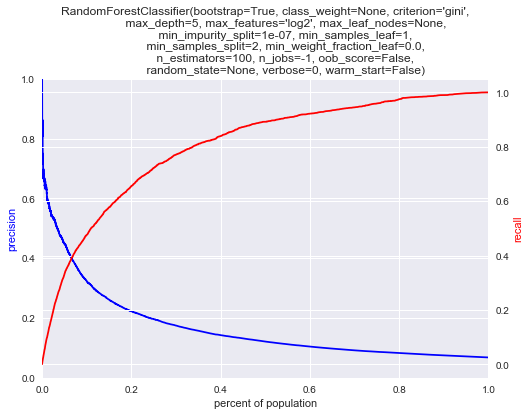

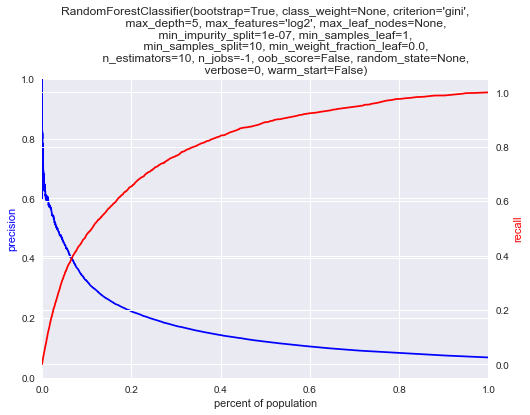

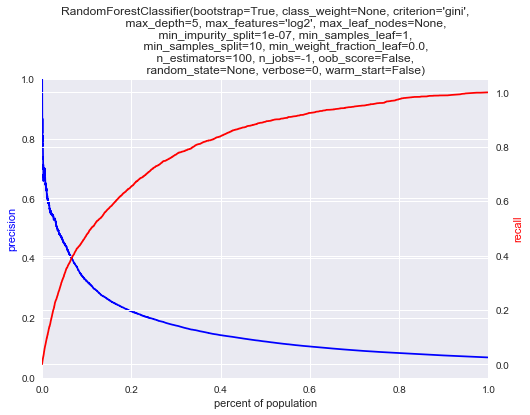

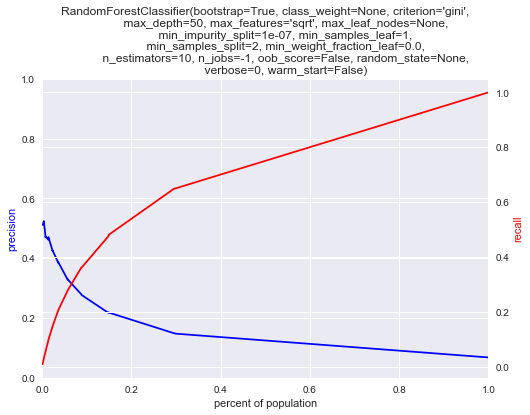

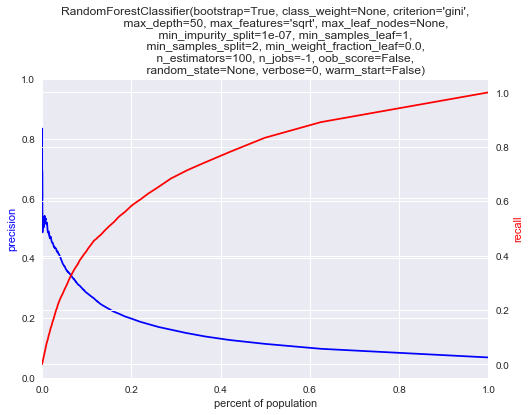

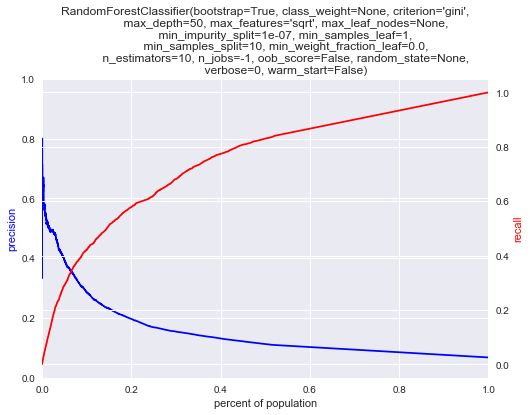

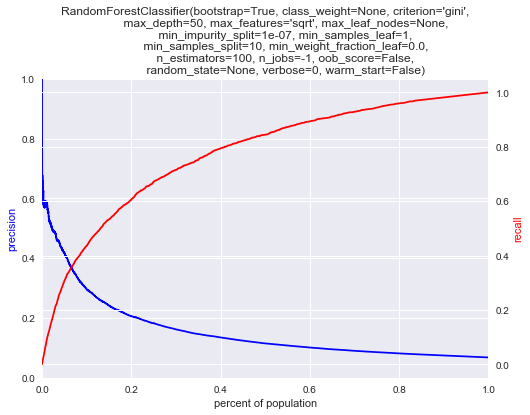

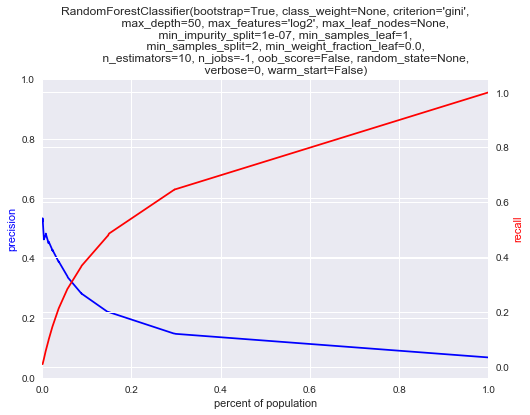

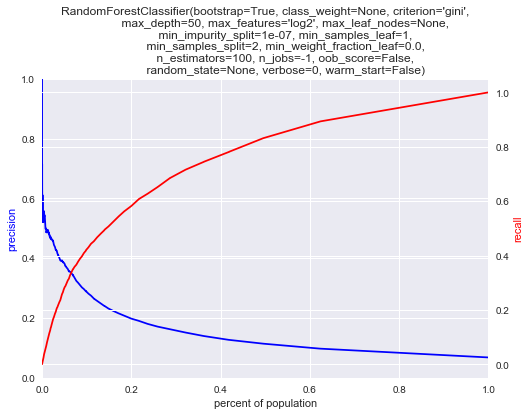

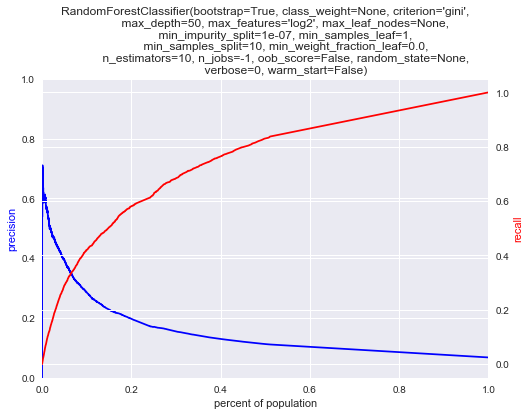

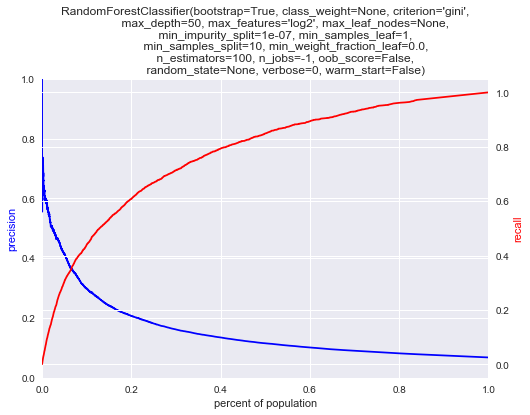

DT


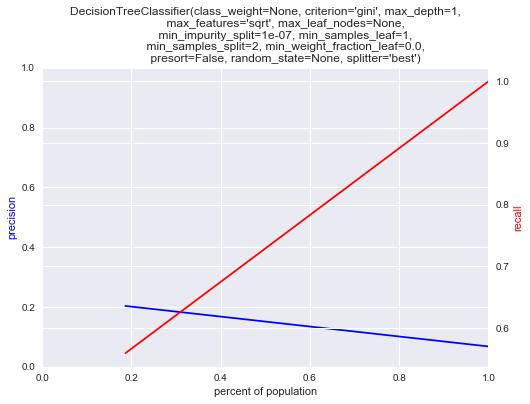

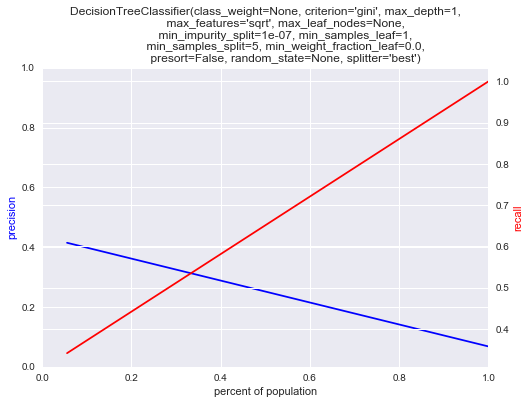

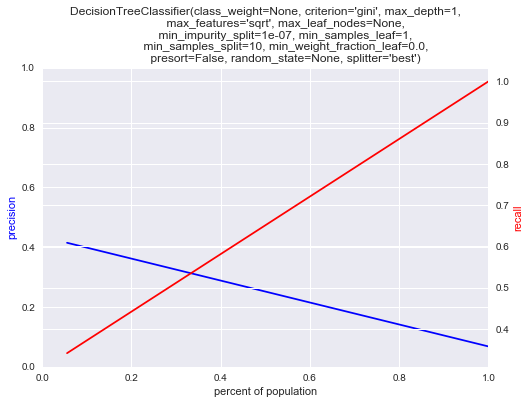

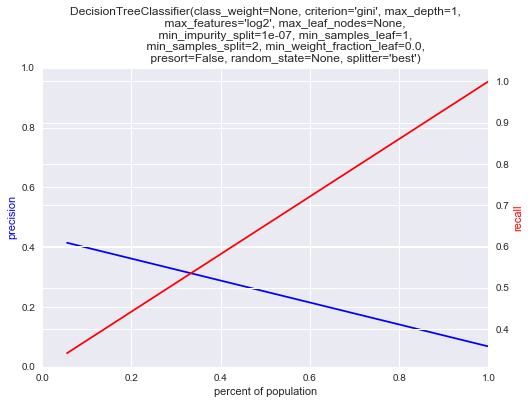

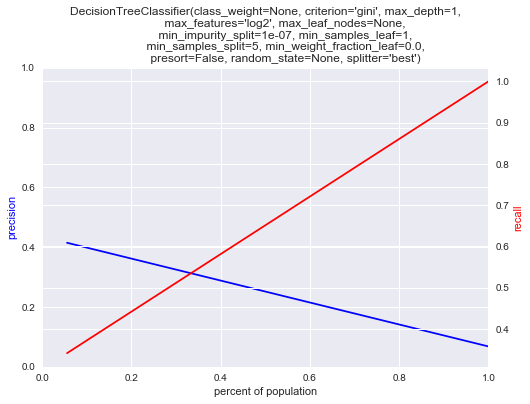

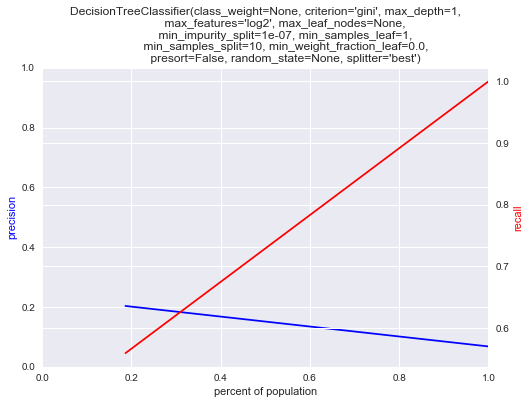

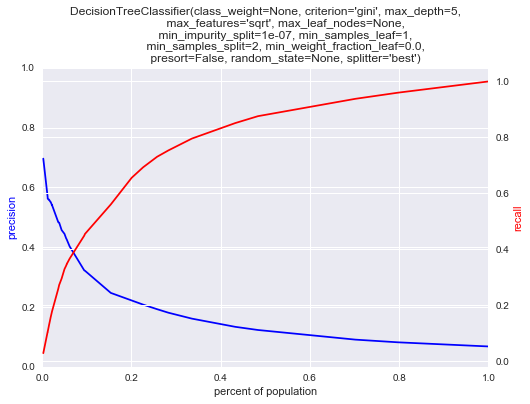

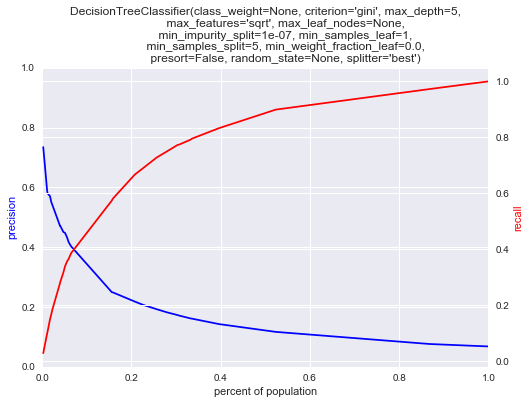

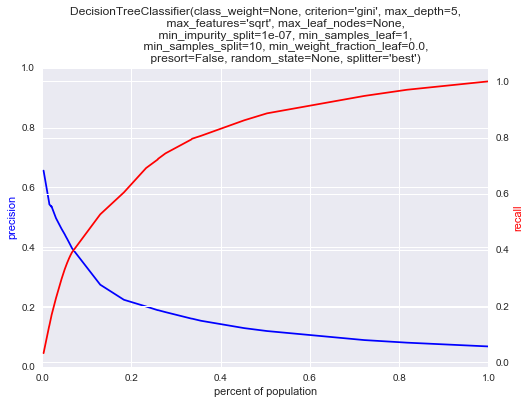

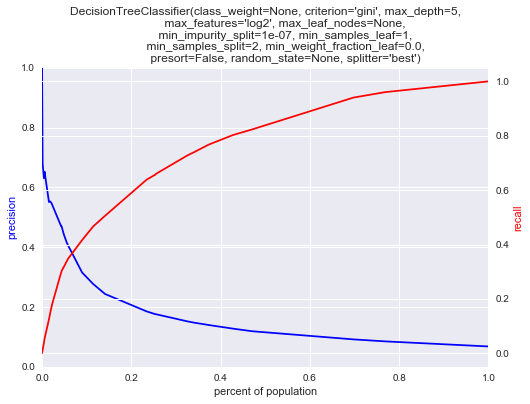

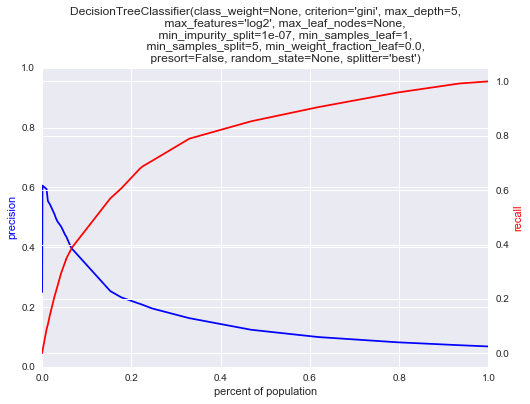

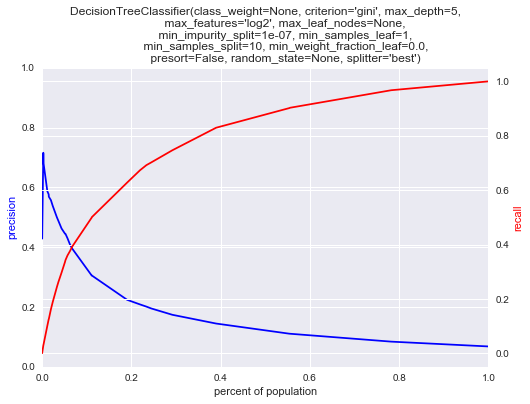

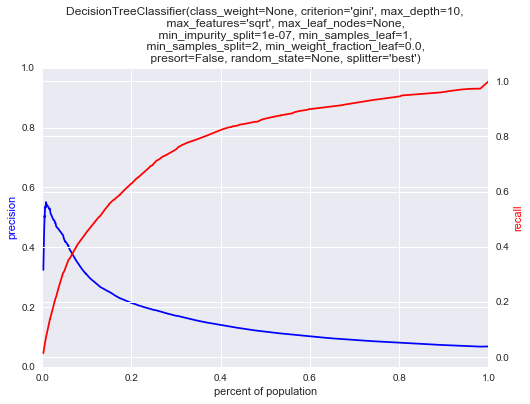

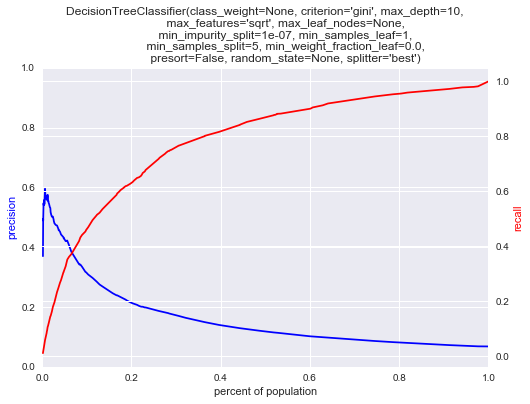

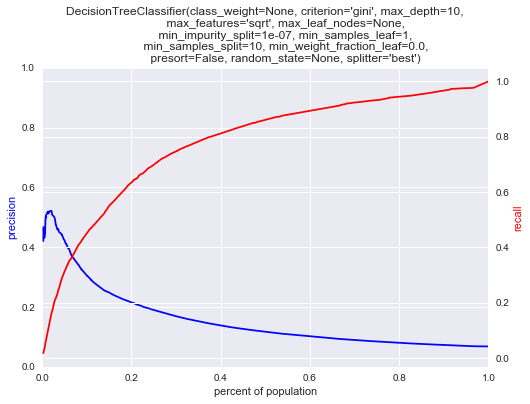

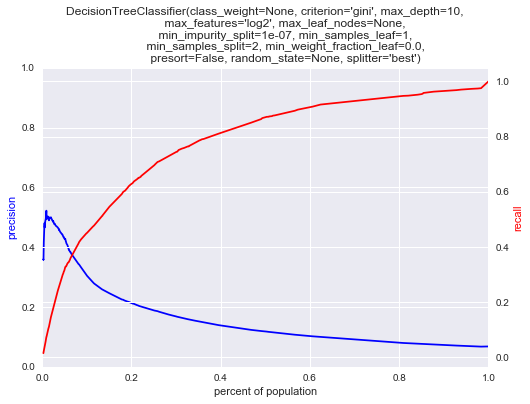

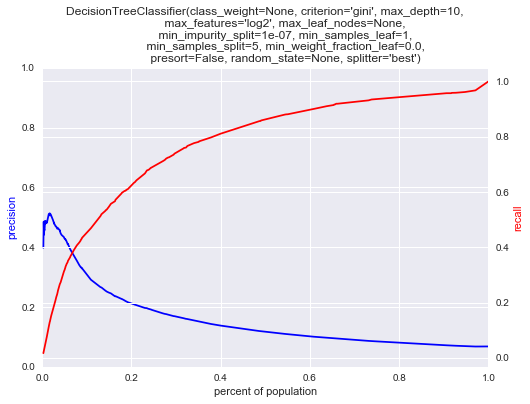

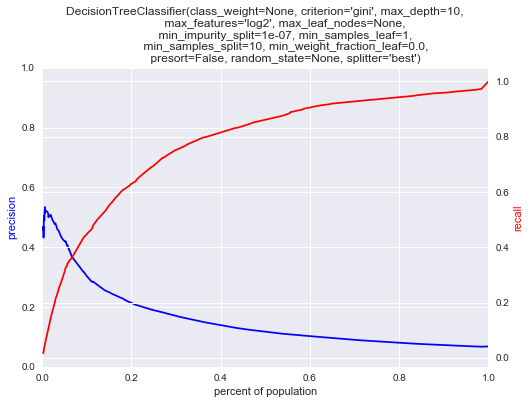

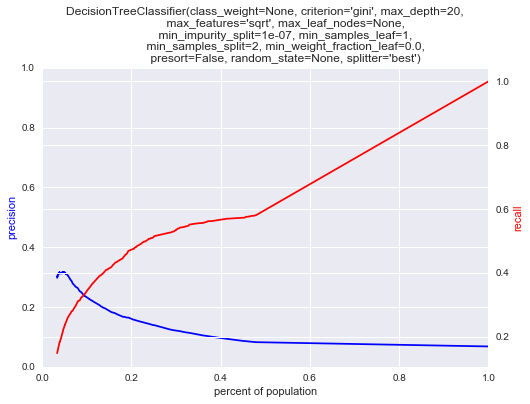

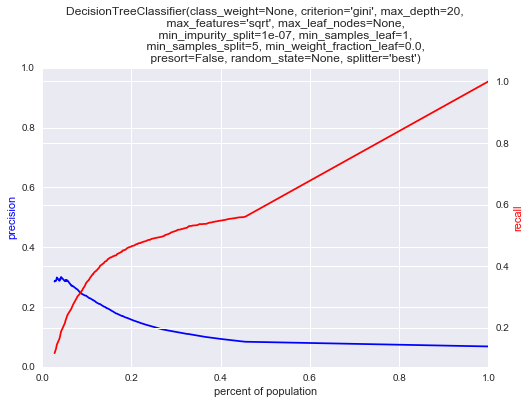

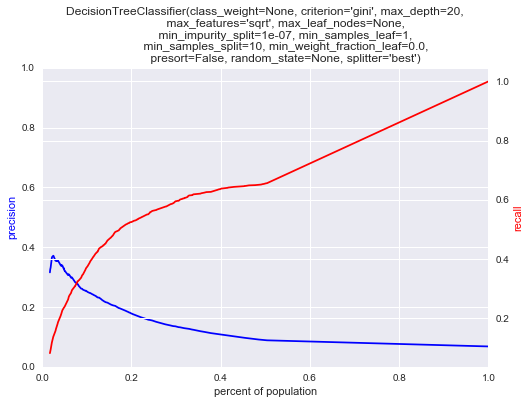

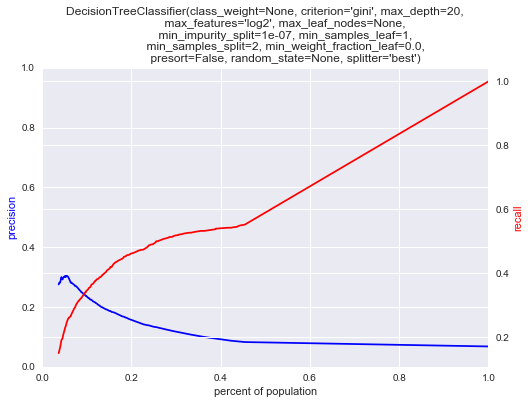

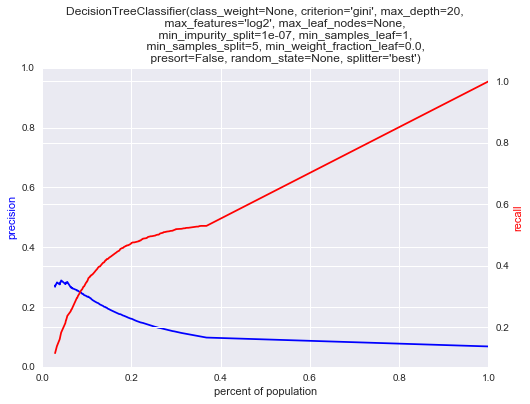

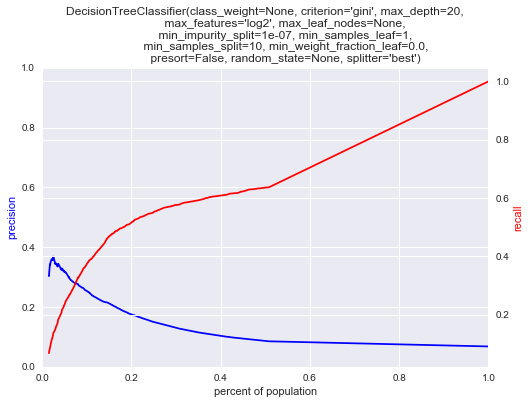

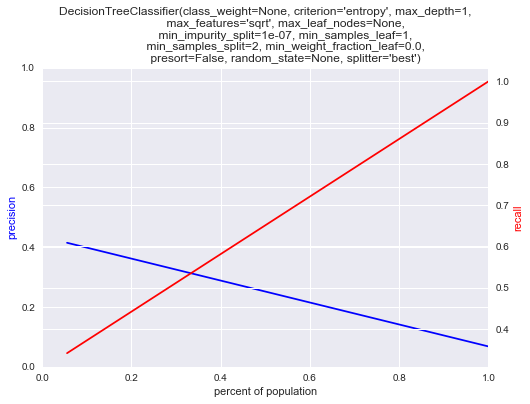

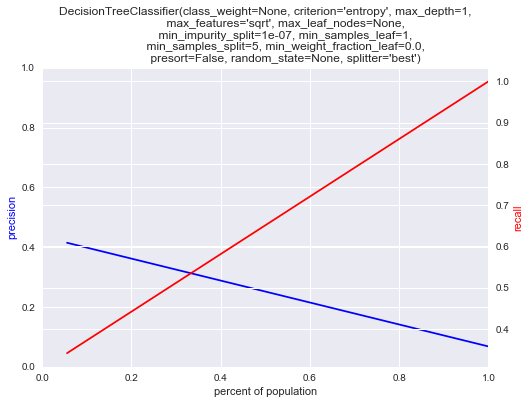

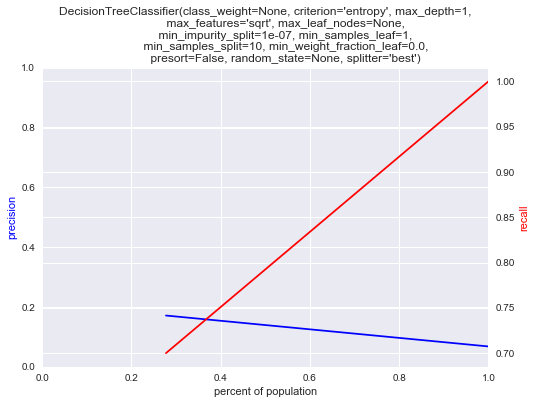

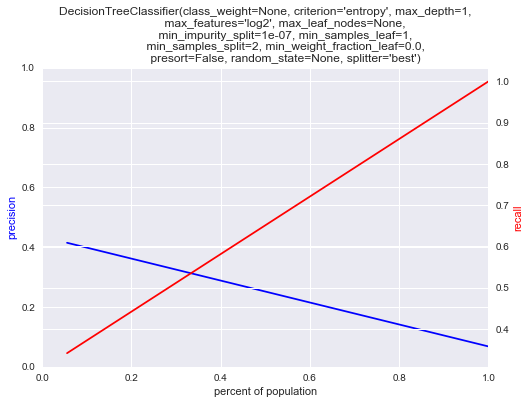

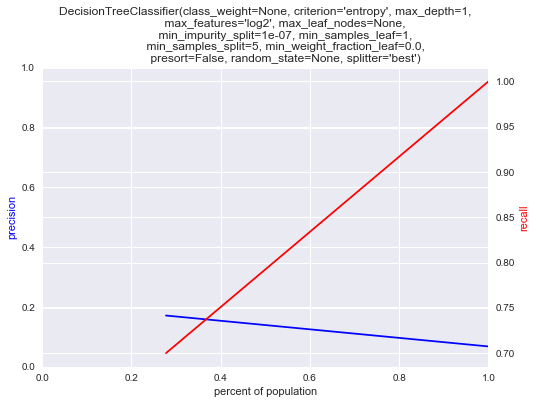

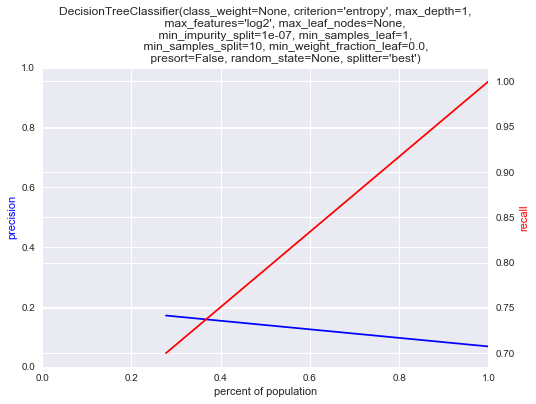

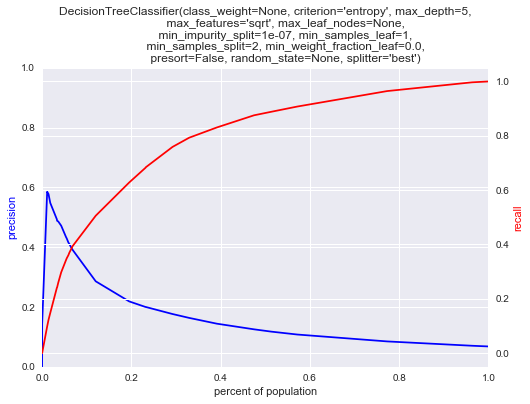

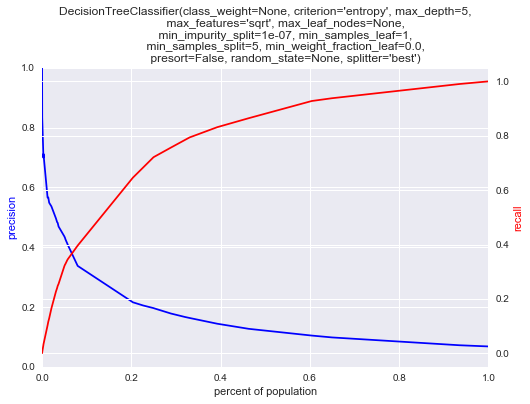

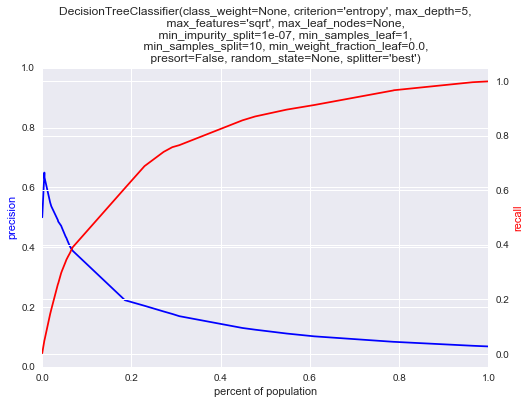

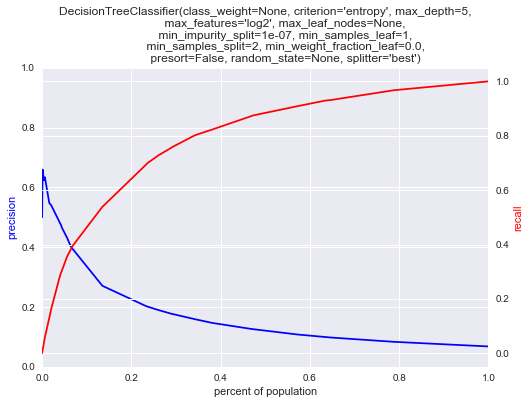

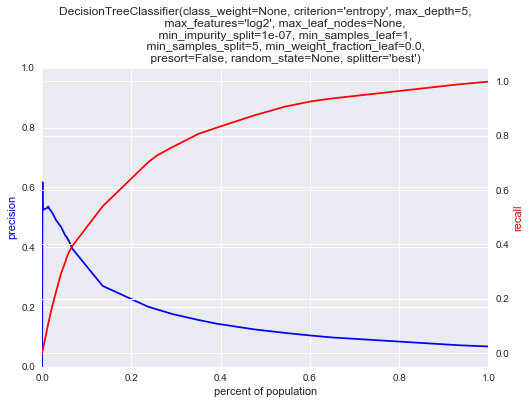

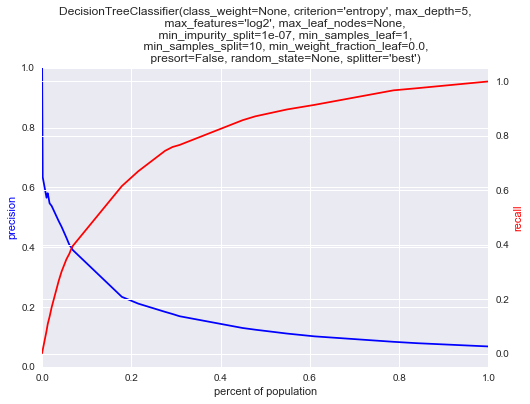

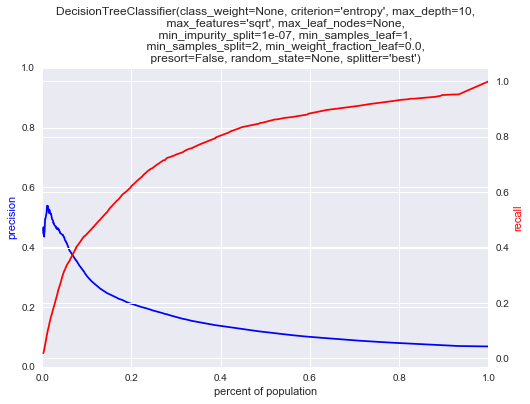

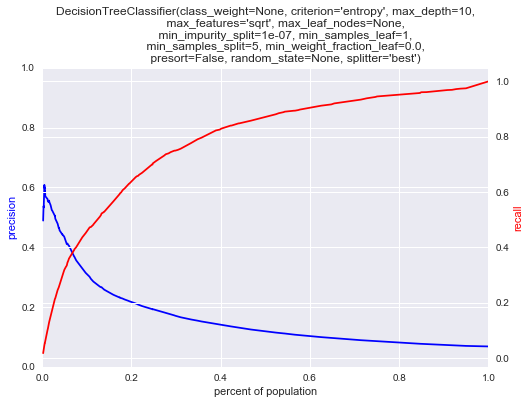

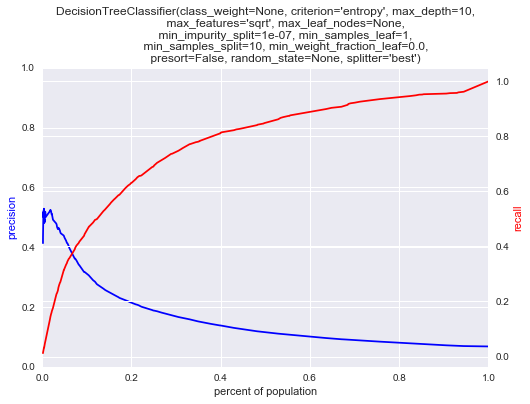

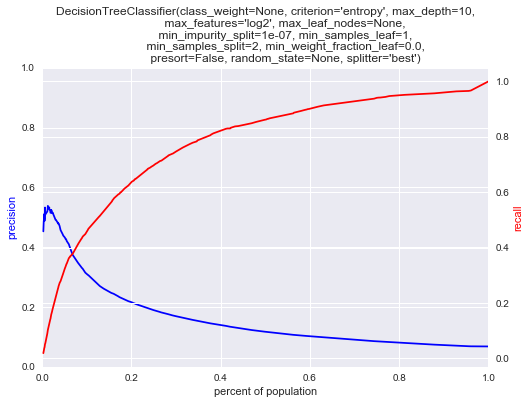

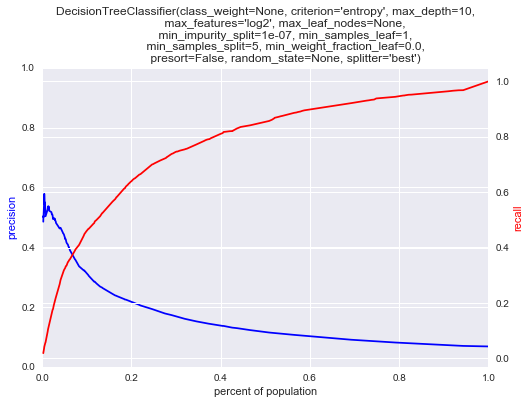

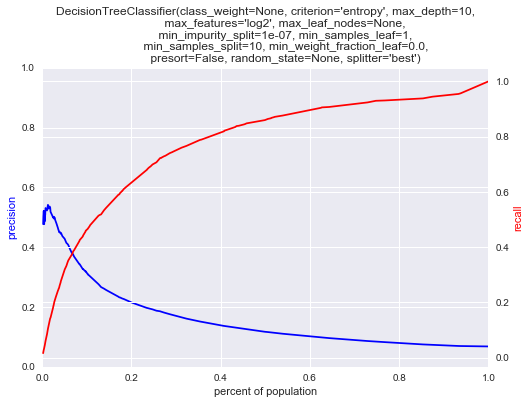

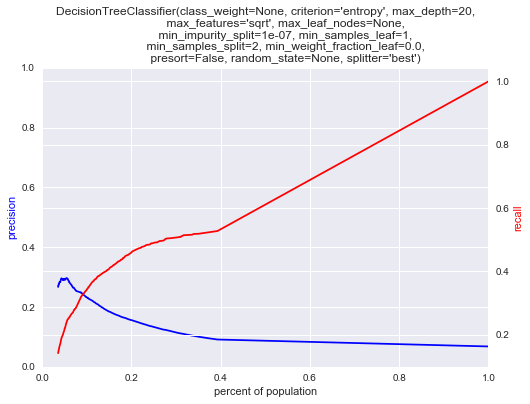

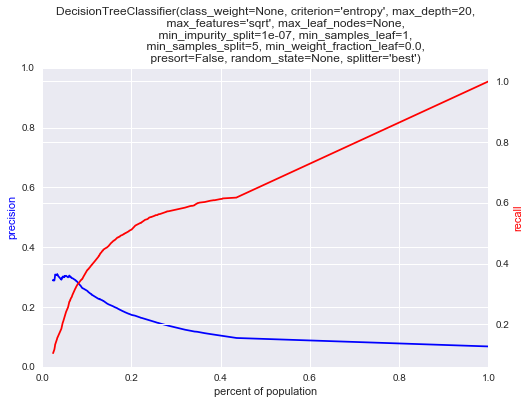

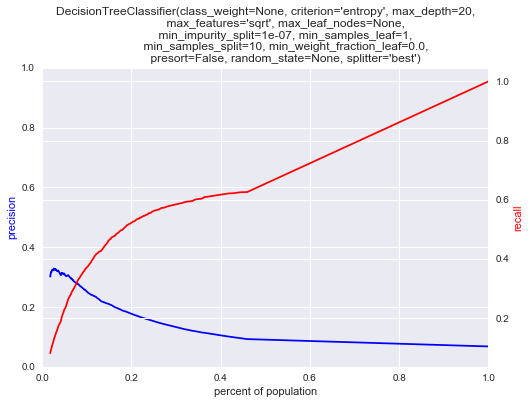

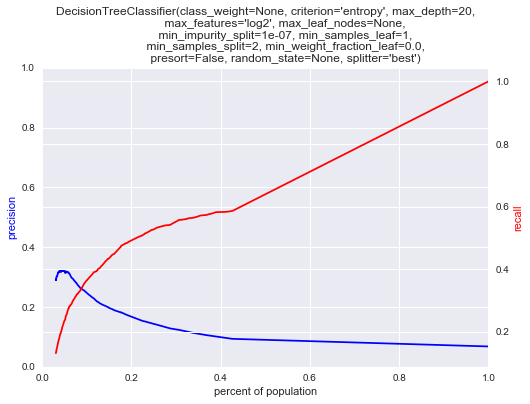

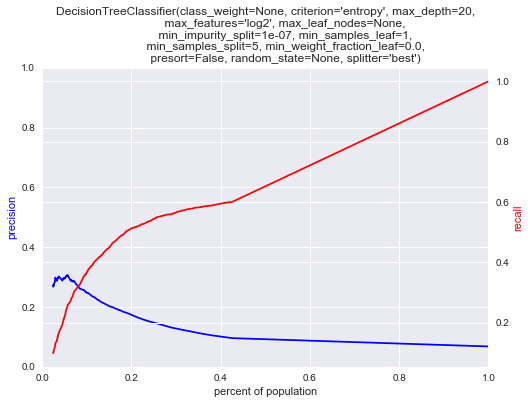

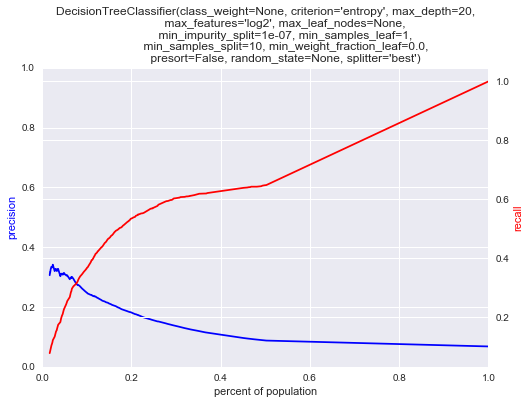

LR


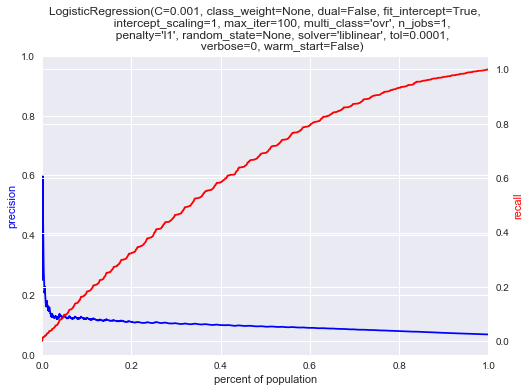

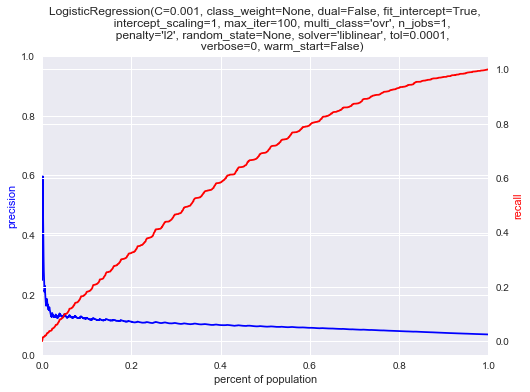

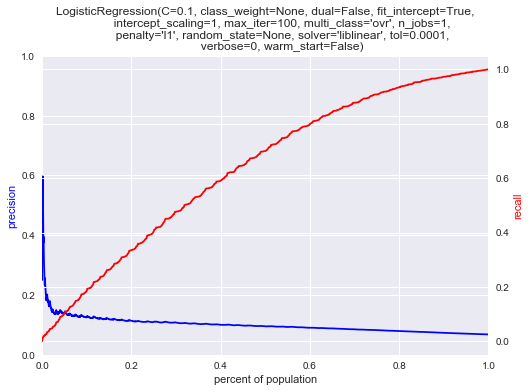

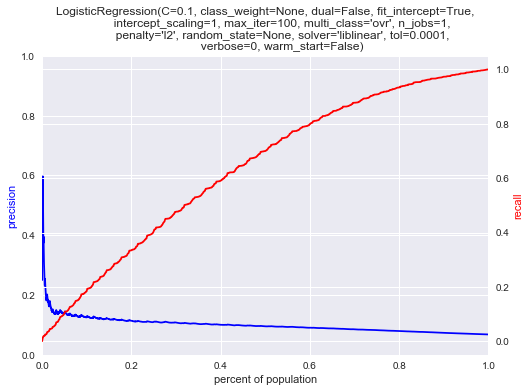

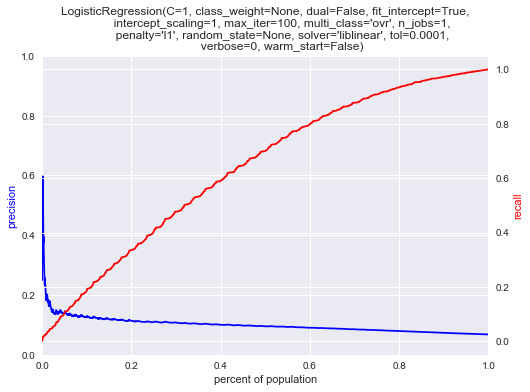

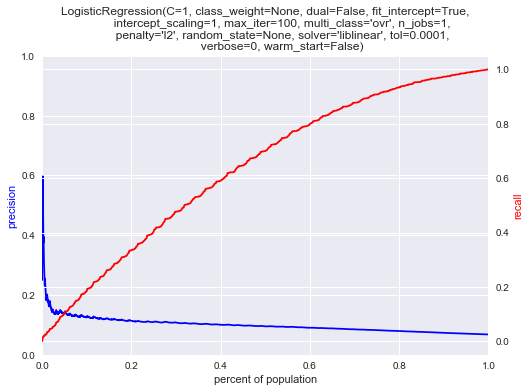

KNN


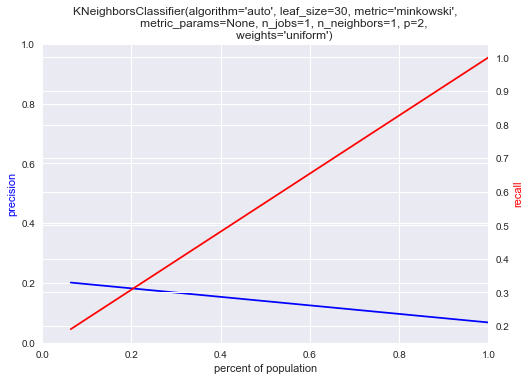

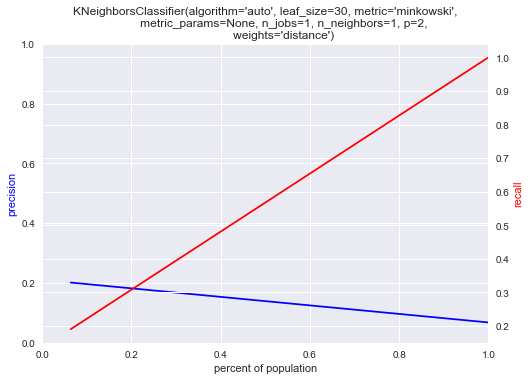

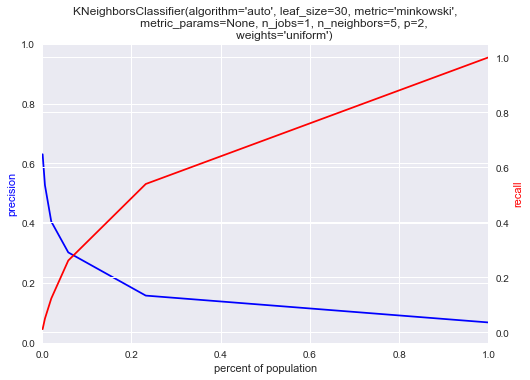

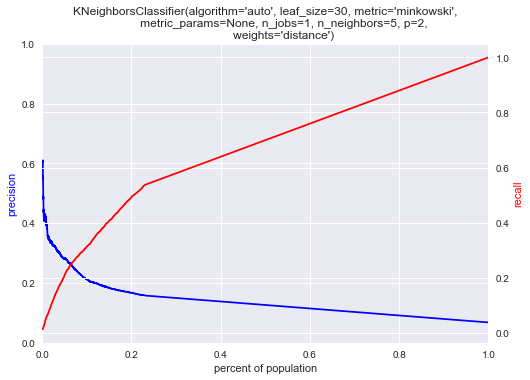

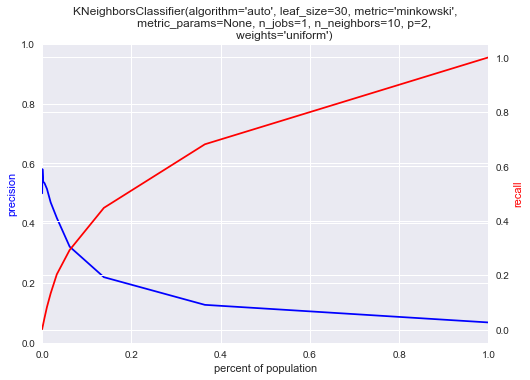

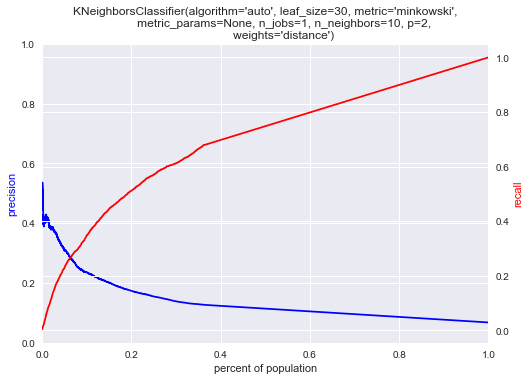

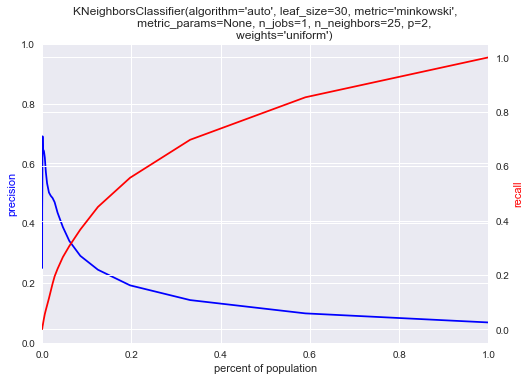

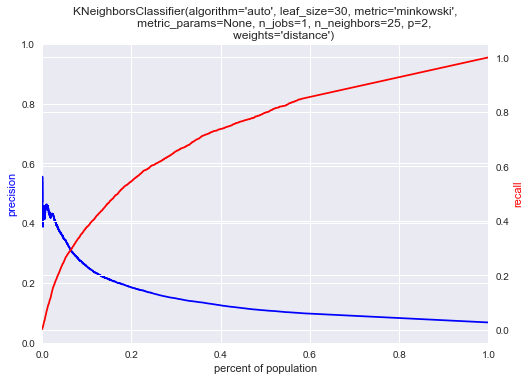

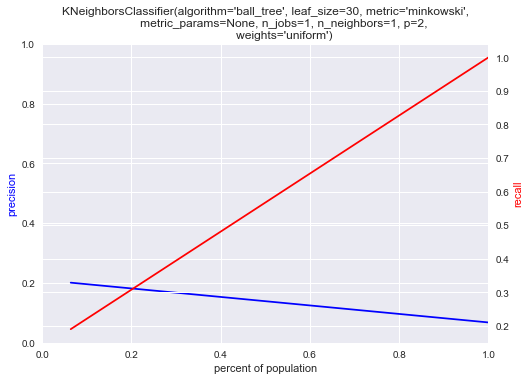

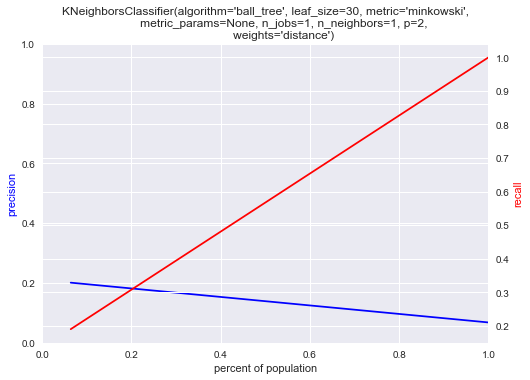

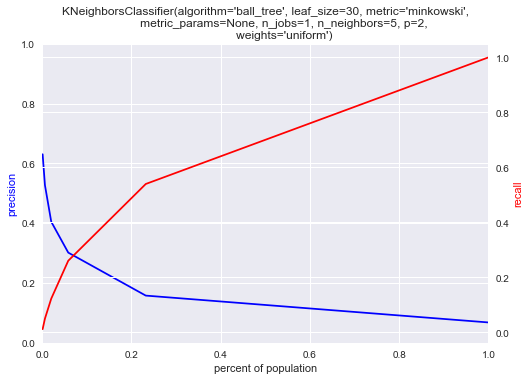

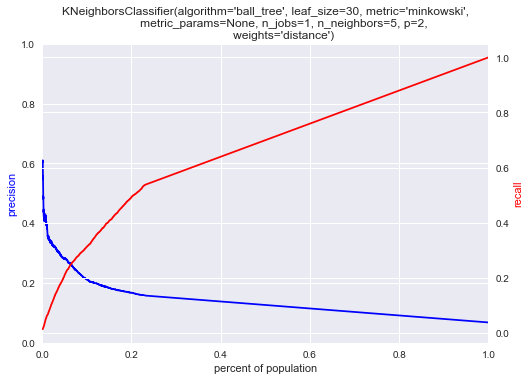

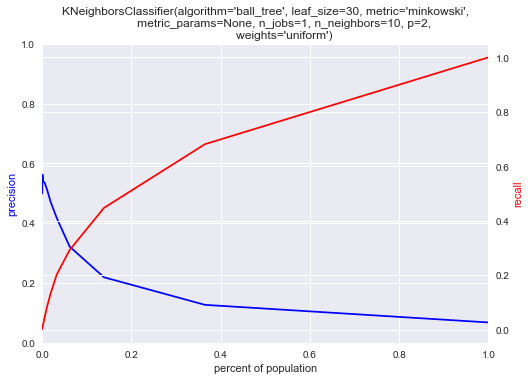

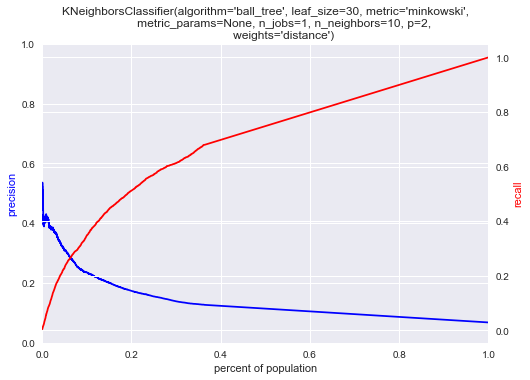

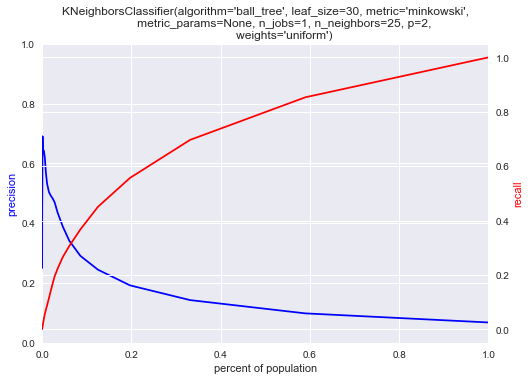

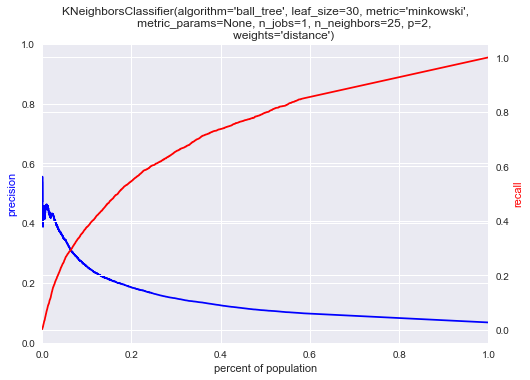

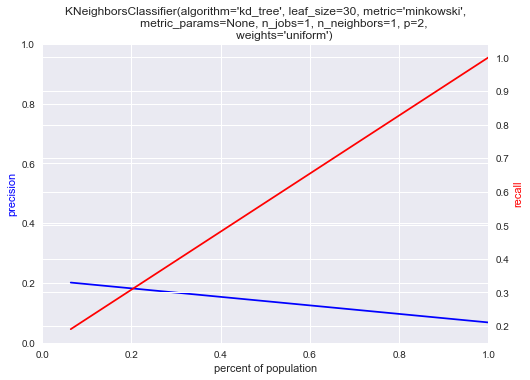

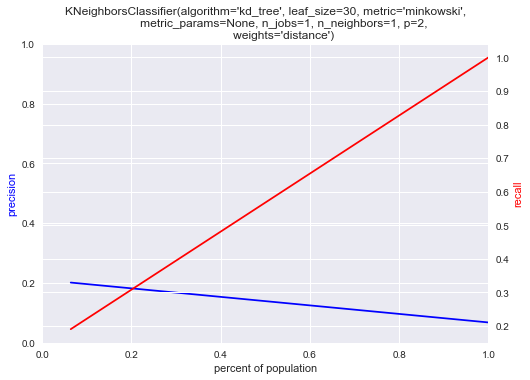

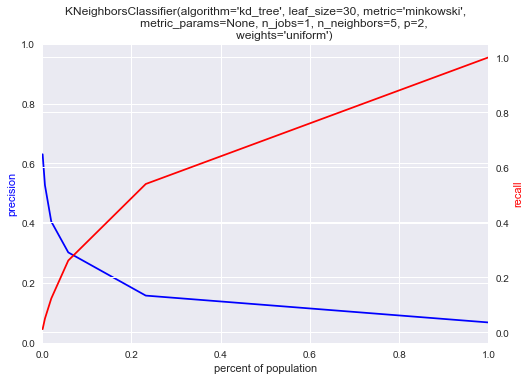

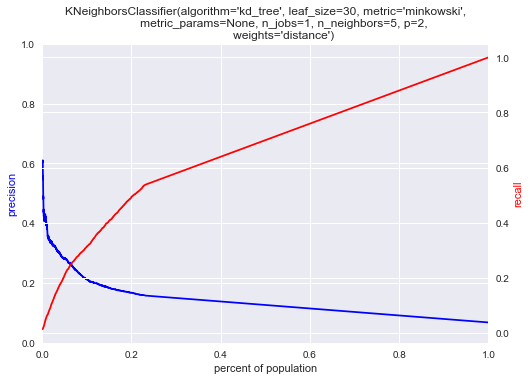

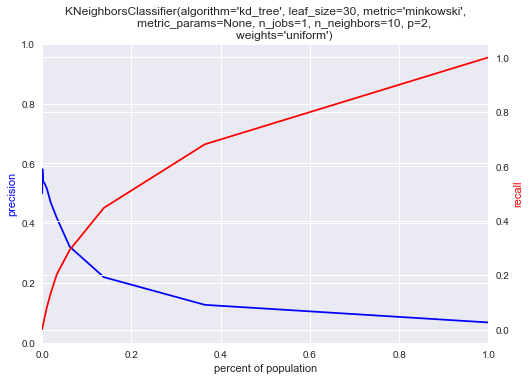

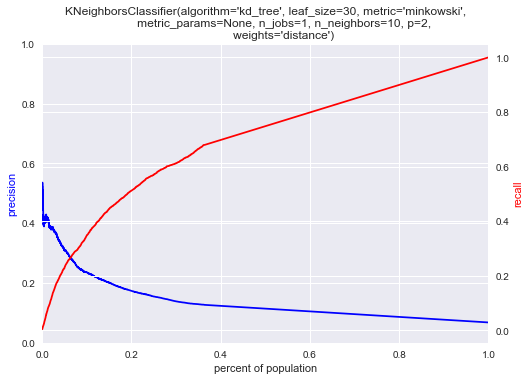

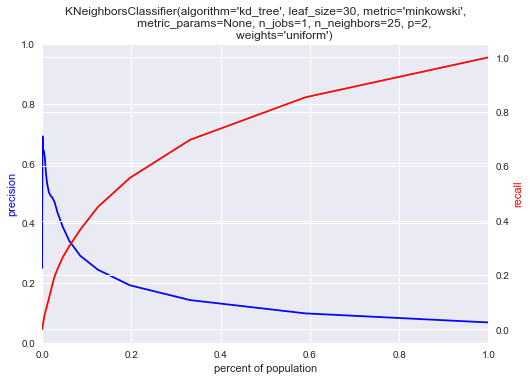

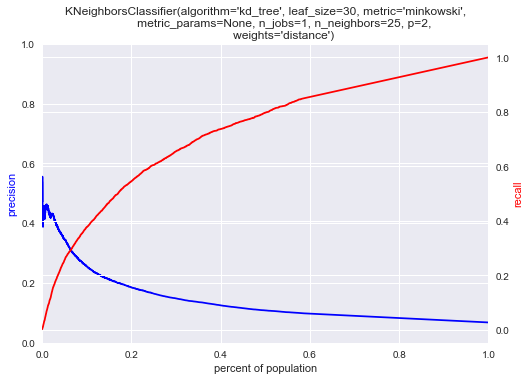

GB


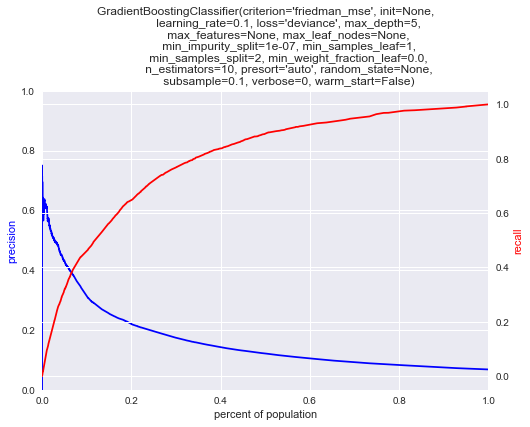

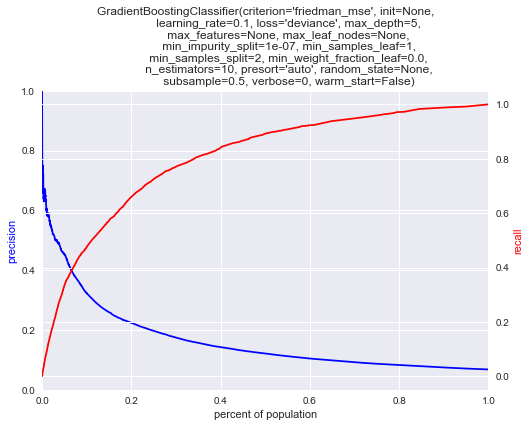

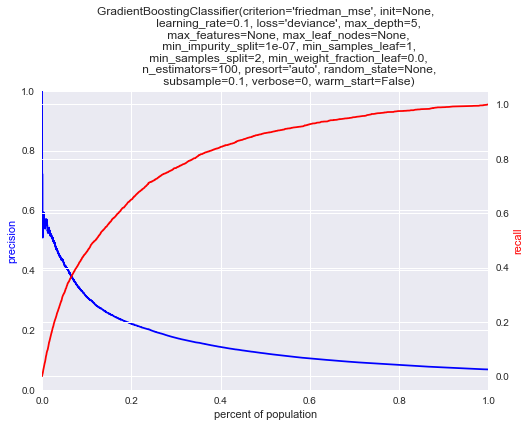

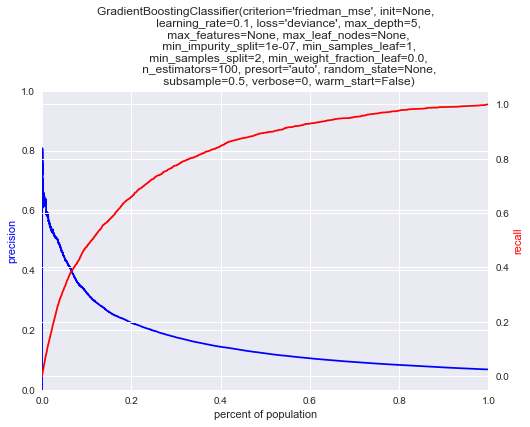

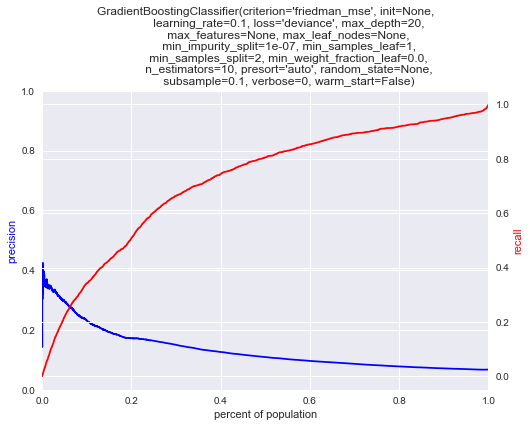

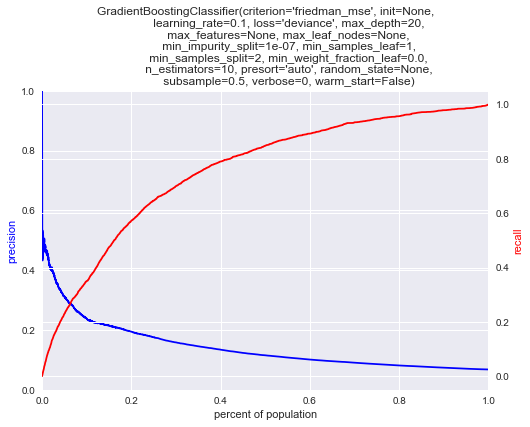

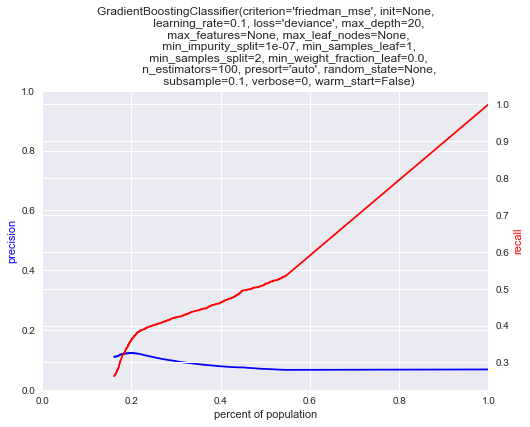

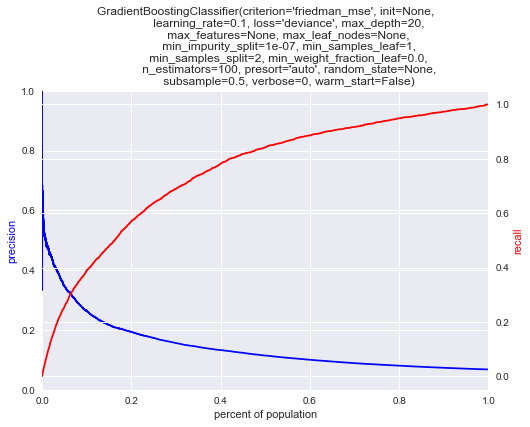

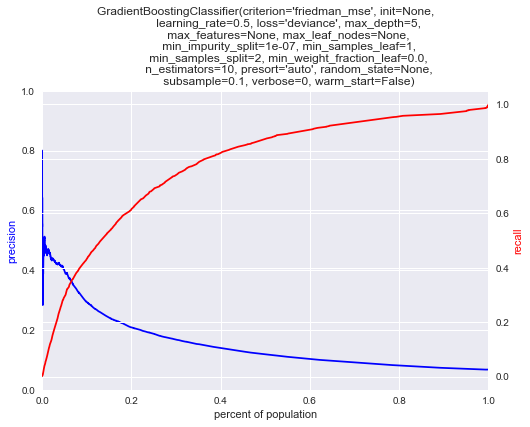

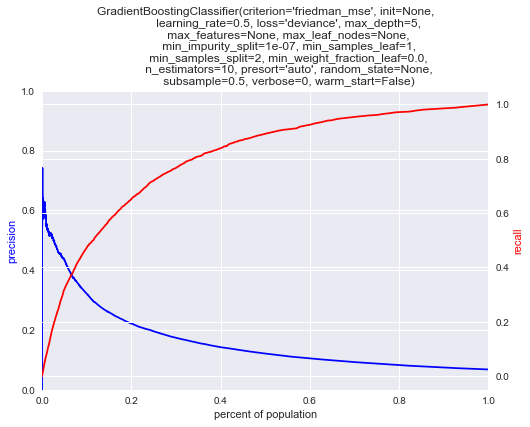

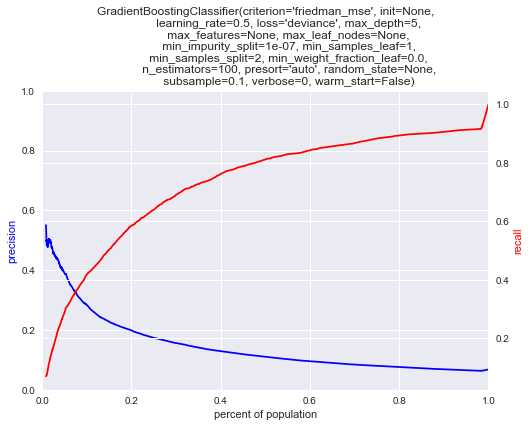

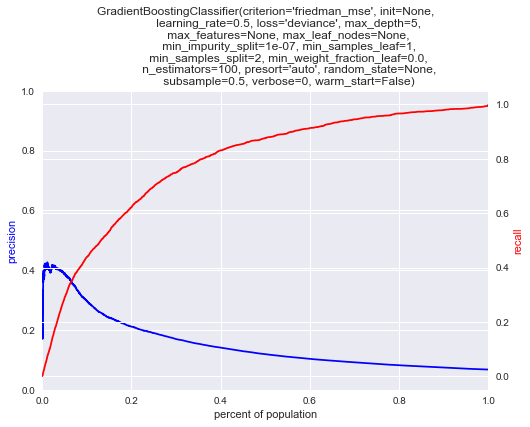

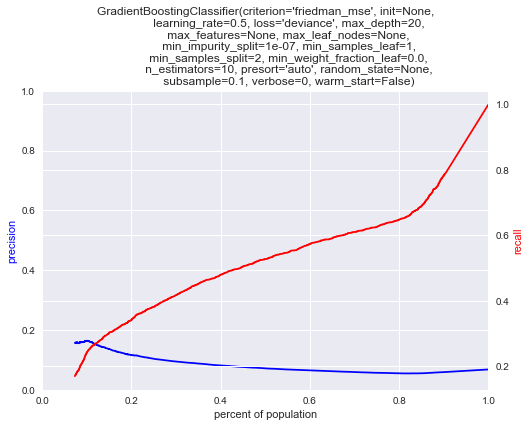

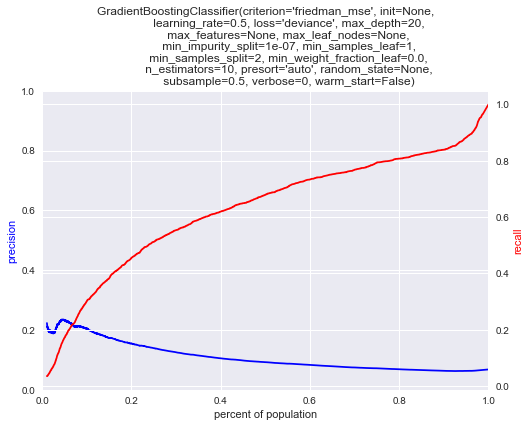

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


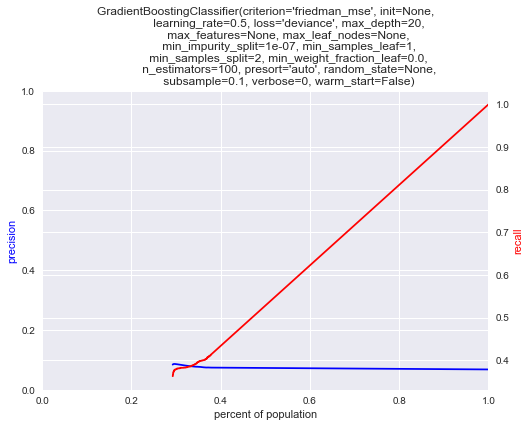

In [ ]:
main(credit_data)

In [ ]:
Summary: You should also write a short report (1-2 pages) that compares the performance of the different classifiers 
    across all the metrics for the data set used in the last assignment. Which classifier does better on which
    metrics? Which one runs faster? What would be your recommendation to someone who's working on the credit model?